In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import pytensor.tensor as pt


In [2]:
az.style.use("arviz-grayscale")
from cycler import cycler

default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc("axes", prop_cycle=default_cycler)
plt.rc("figure", dpi=300)
np.random.seed(123)

In [3]:
pen = pd.read_csv("data/penguins.csv").dropna()
Y = pen["body_mass"]
pen['sex'].replace(['male', 'female'],[0, 1], inplace=True)
pen['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)

X = pen[["flipper_length", "bill_depth", "bill_length"]]
# X = X[~np.isnan(Y)]
#Y.dropna(inplace=True)
pen

species     island  bill_length  bill_depth  flipper_length  body_mass  \
0          0  Torgersen         3.91        1.87            18.1      3.750   
1          0  Torgersen         3.95        1.74            18.6      3.800   
2          0  Torgersen         4.03        1.80            19.5      3.250   
4          0  Torgersen         3.67        1.93            19.3      3.450   
5          0  Torgersen         3.93        2.06            19.0      3.650   
..       ...        ...          ...         ...             ...        ...   
339        1      Dream         5.58        1.98            20.7      4.000   
340        1      Dream         4.35        1.81            20.2      3.400   
341        1      Dream         4.96        1.82            19.3      3.775   
342        1      Dream         5.08        1.90            21.0      4.100   
343        1      Dream         5.02        1.87            19.8      3.775   

     sex  year  
0      0  2007  
1      1  2007  
2      1  2007  
4      1  2007  
5      0  2007  
..   ...   ...  
339    0  2009  
340    1  2009  
341    0  2009  
342    0  2009  
343    1  2009  

[333 rows x 8 columns]

In [4]:
with pm.Model() as model_pen:
    σ = pm.HalfNormal("σ", 1)
    μ = pmb.BART("μ", X, Y, m=50)
    y = pm.Normal("y", mu=μ, sigma=σ, observed=Y)
    idata_pen = pm.sample(random_seed=123)
    pm.sample_posterior_predictive(idata_pen, extend_inferencedata=True, random_seed=123)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Sampling: [y]


In [5]:
idata_pen.posterior_predictive.min()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    y        float64 1.752

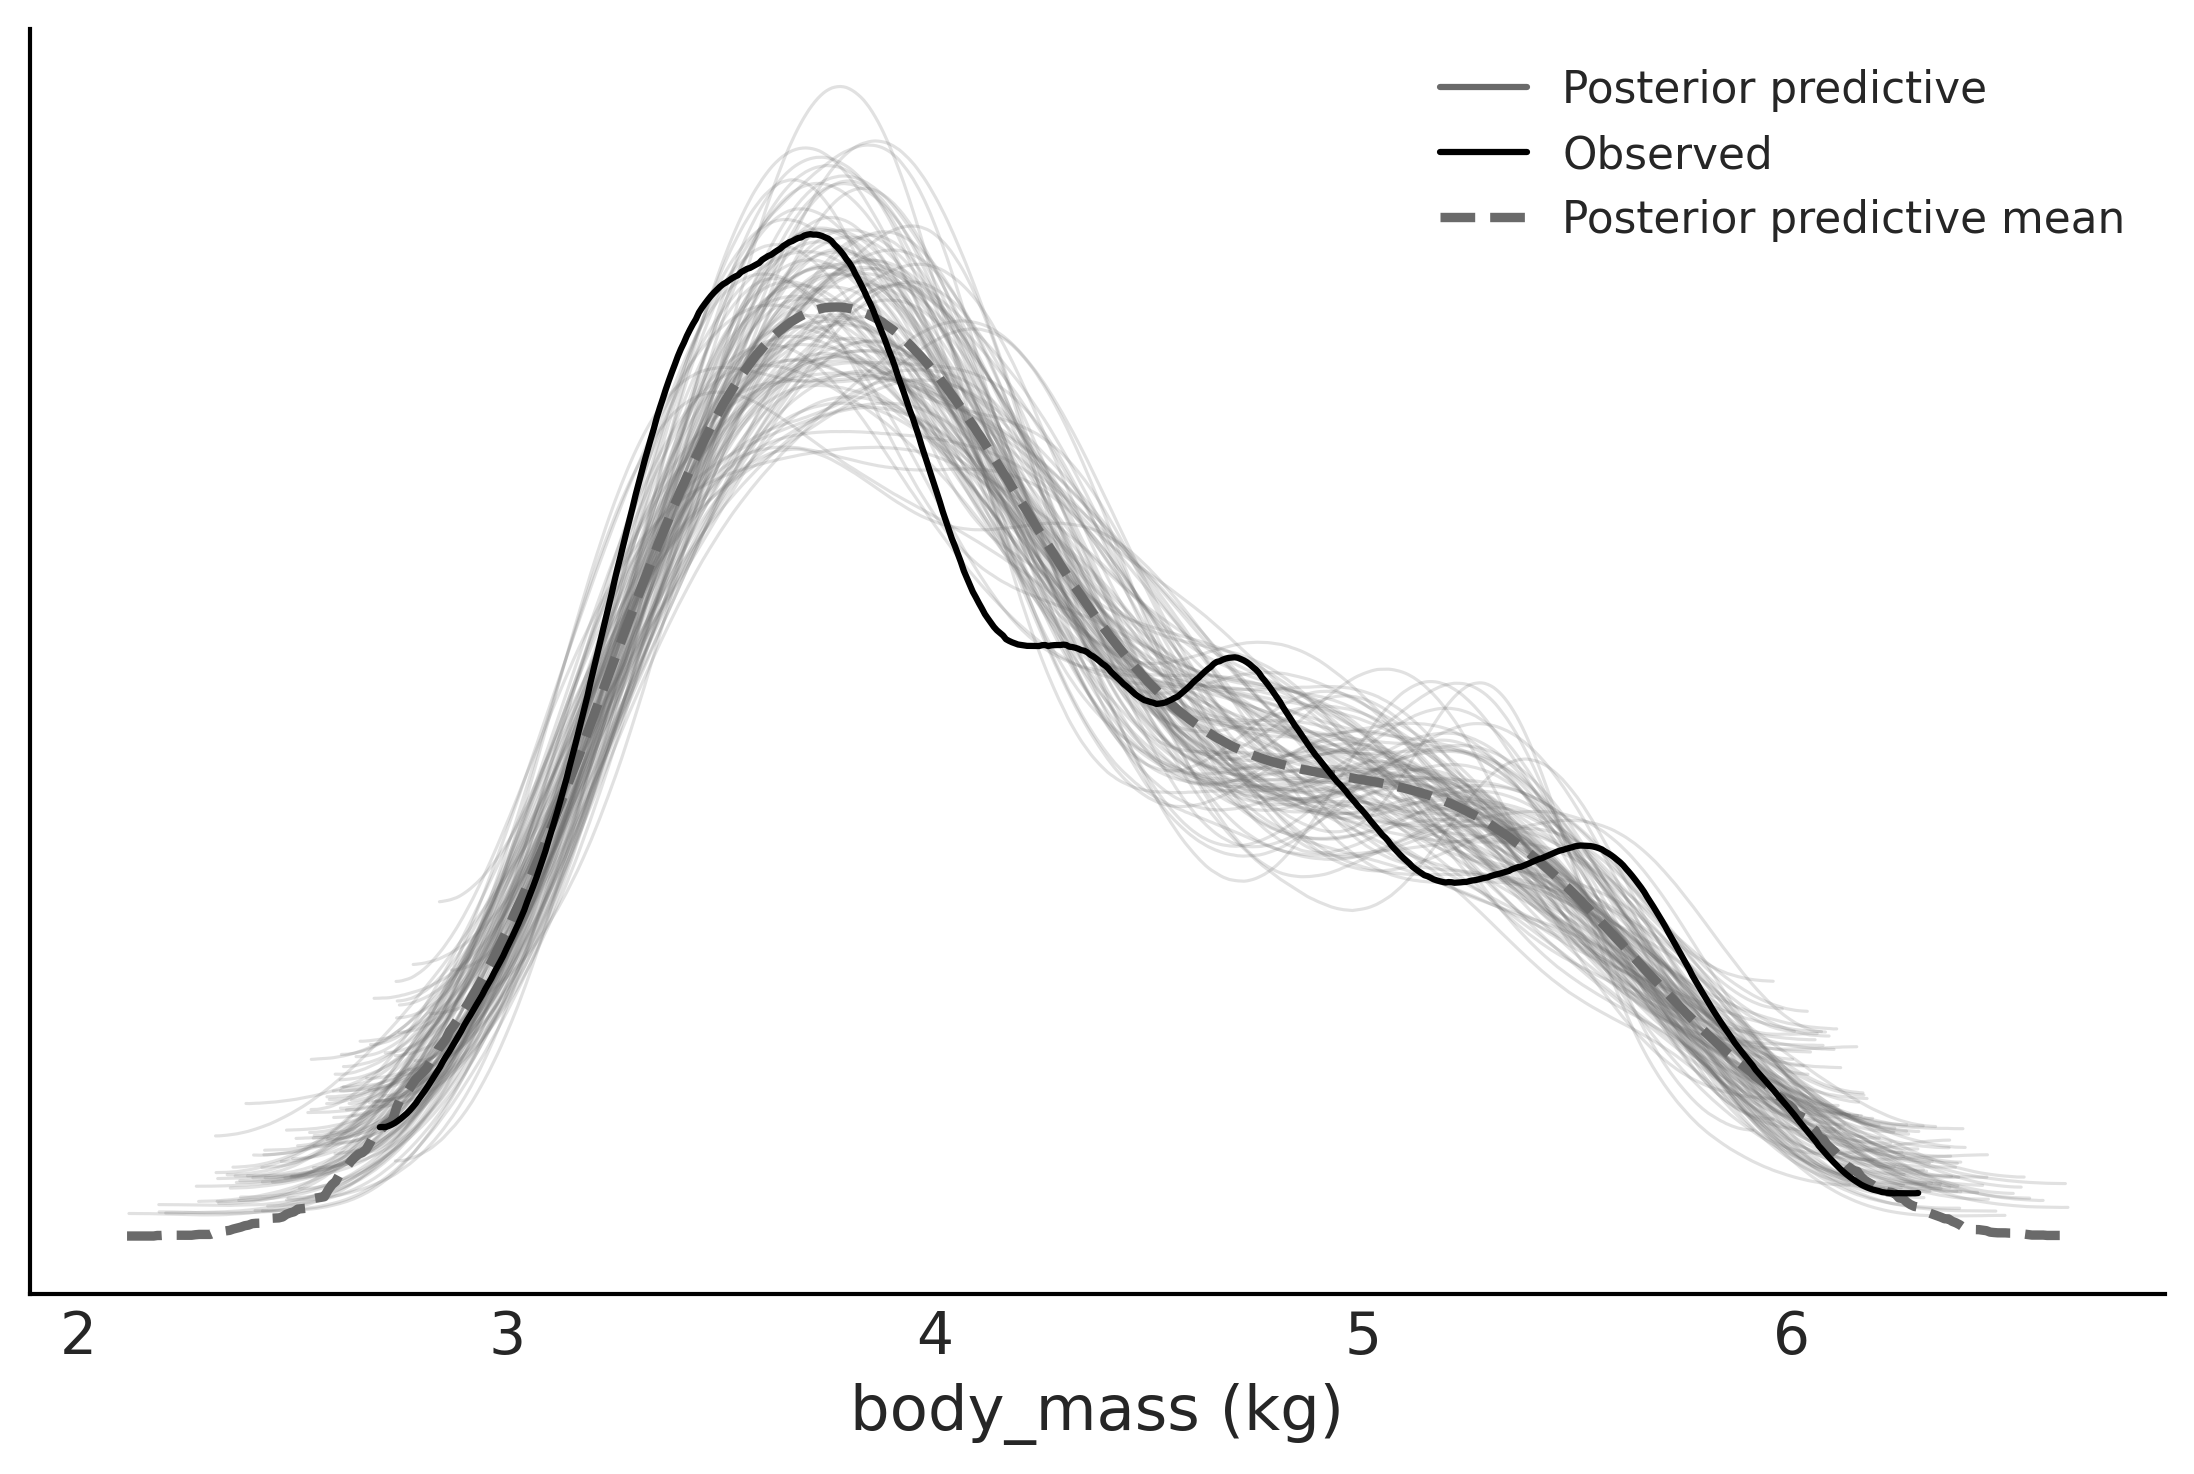

In [6]:
ax = az.plot_ppc(idata_pen, num_pp_samples=100, colors=["C1", "C0", "C1"])
ax.set_xlabel("body_mass (kg)")
plt.savefig("../fig/BART_ppc.png")

In [7]:
az.summary(idata_pen, var_names=["~μ"])

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
σ  0.336  0.015   0.307    0.365        0.0      0.0    1124.0    2164.0   

   r_hat  
σ    1.0

/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=Fals

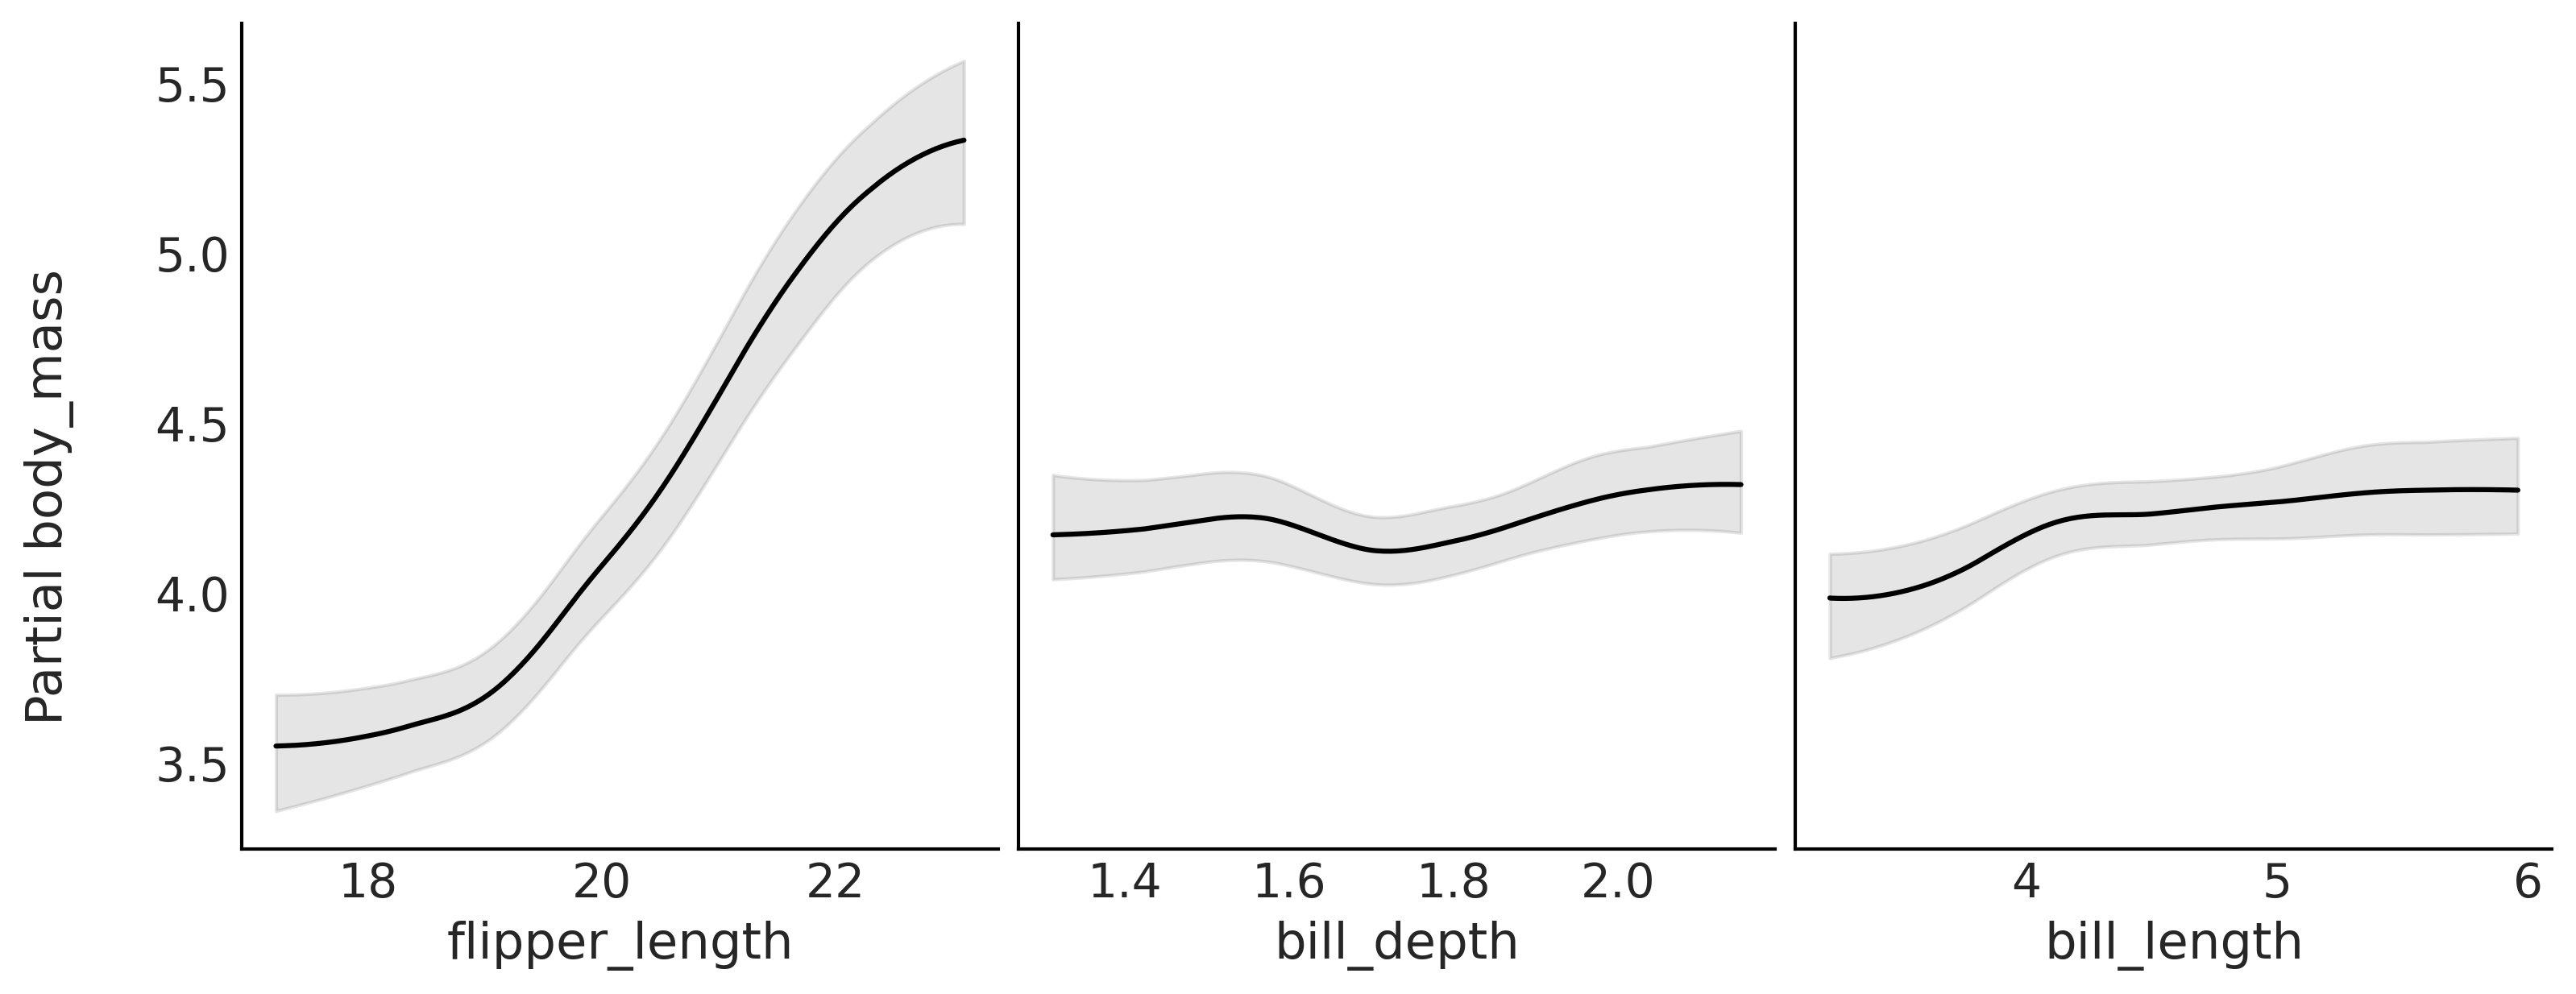

In [8]:
pmb.plot_pdp(μ, X, Y, grid=(1, 3), figsize=(10, 4))
plt.savefig("../fig/BART_pdp.png", bbox_inches="tight")

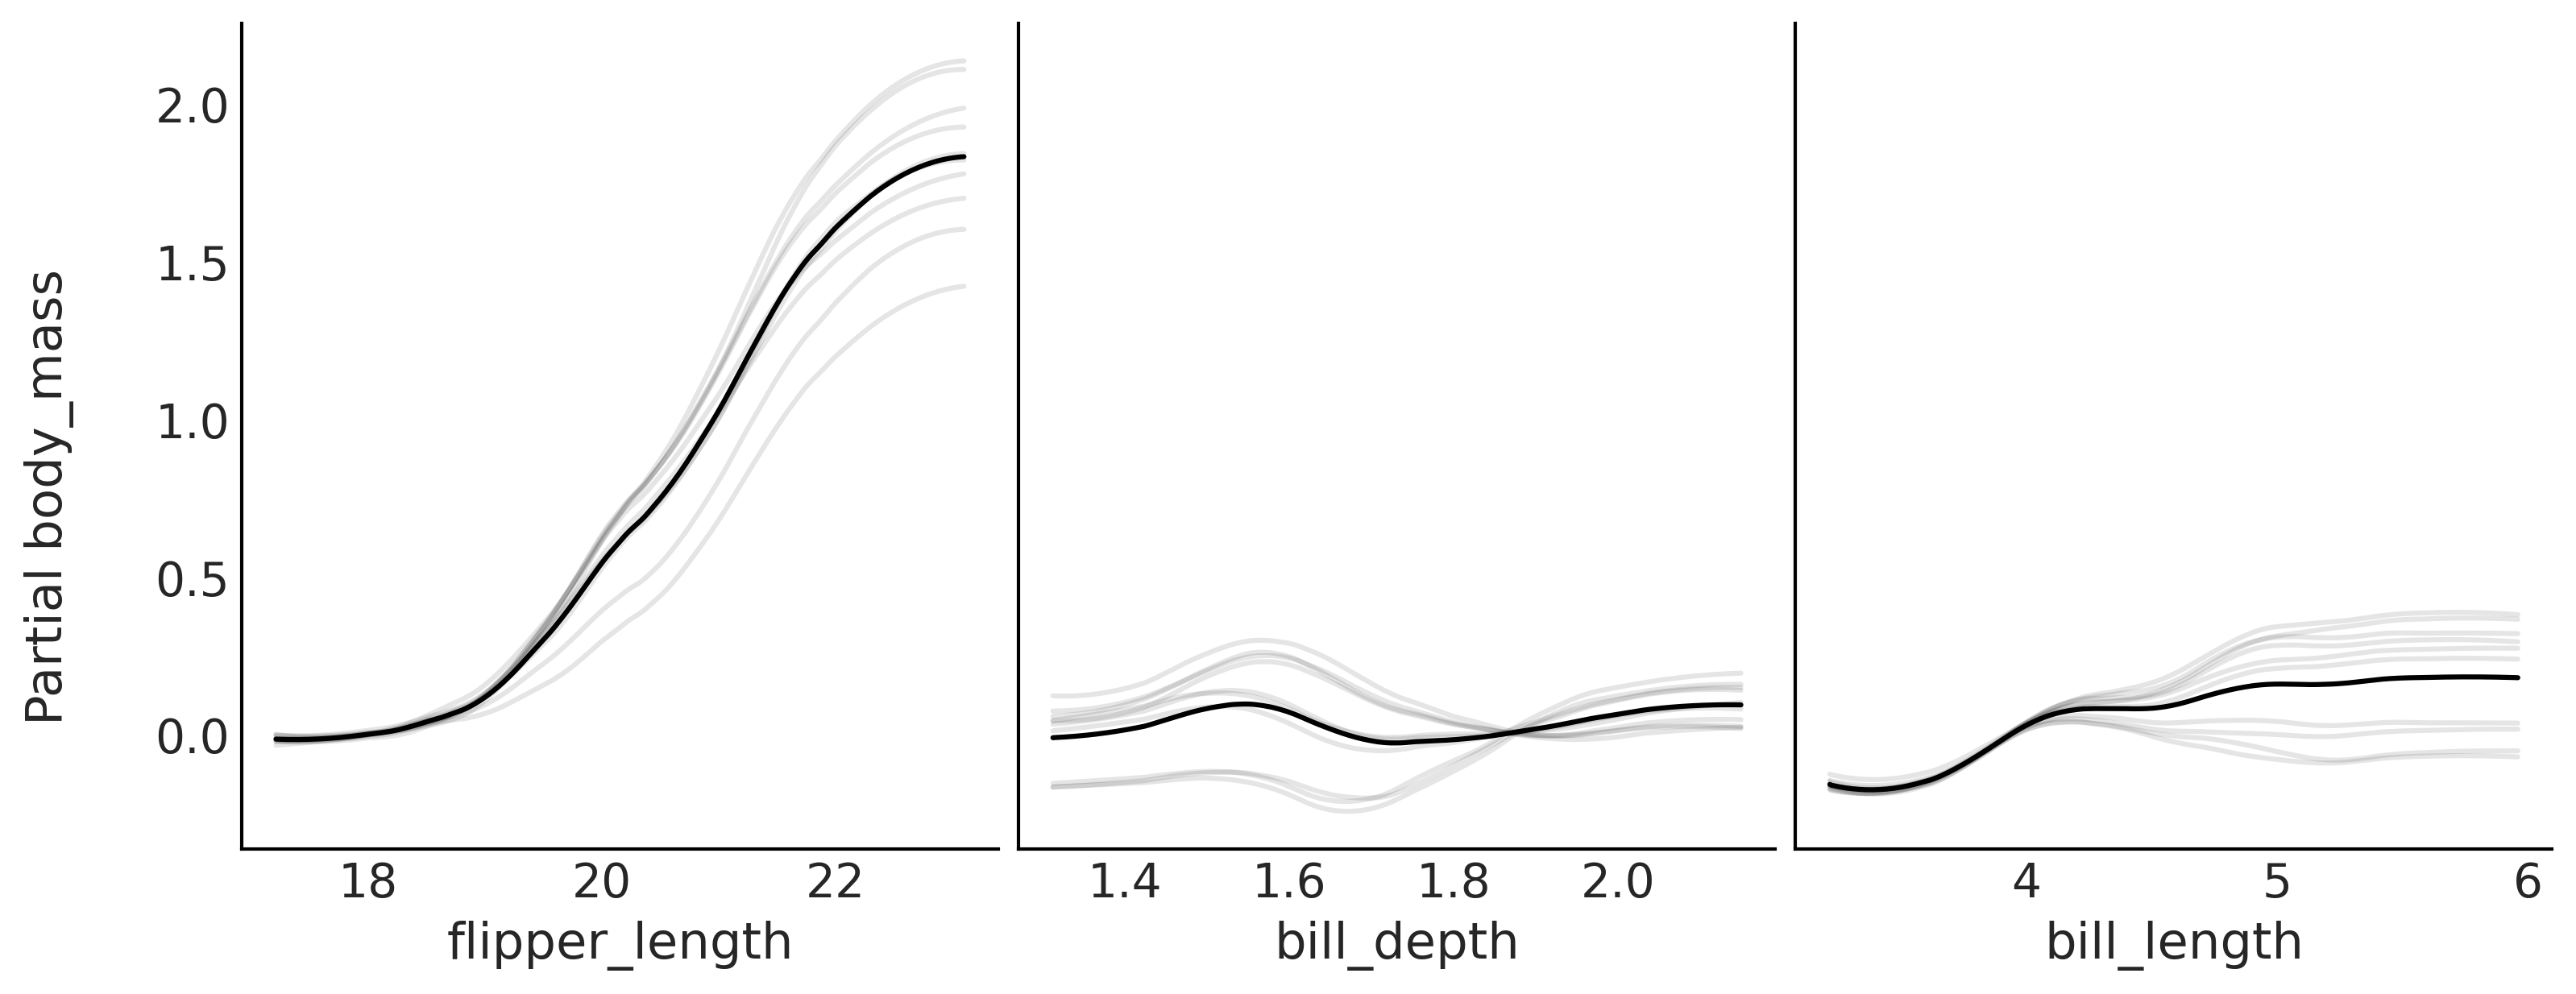

In [9]:
pmb.plot_ice(μ, X, Y, grid=(1, 3), figsize=(10, 4))
plt.savefig("../fig/BART_ice.png", bbox_inches="tight")

/home/osvaldo/proyectos/00_BM/pymc-bart/pymc_bart/utils.py:778: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  chains_hdi = az.hdi((var_imp_chains.T / var_imp_chains.sum(axis=1)).T)[indices]


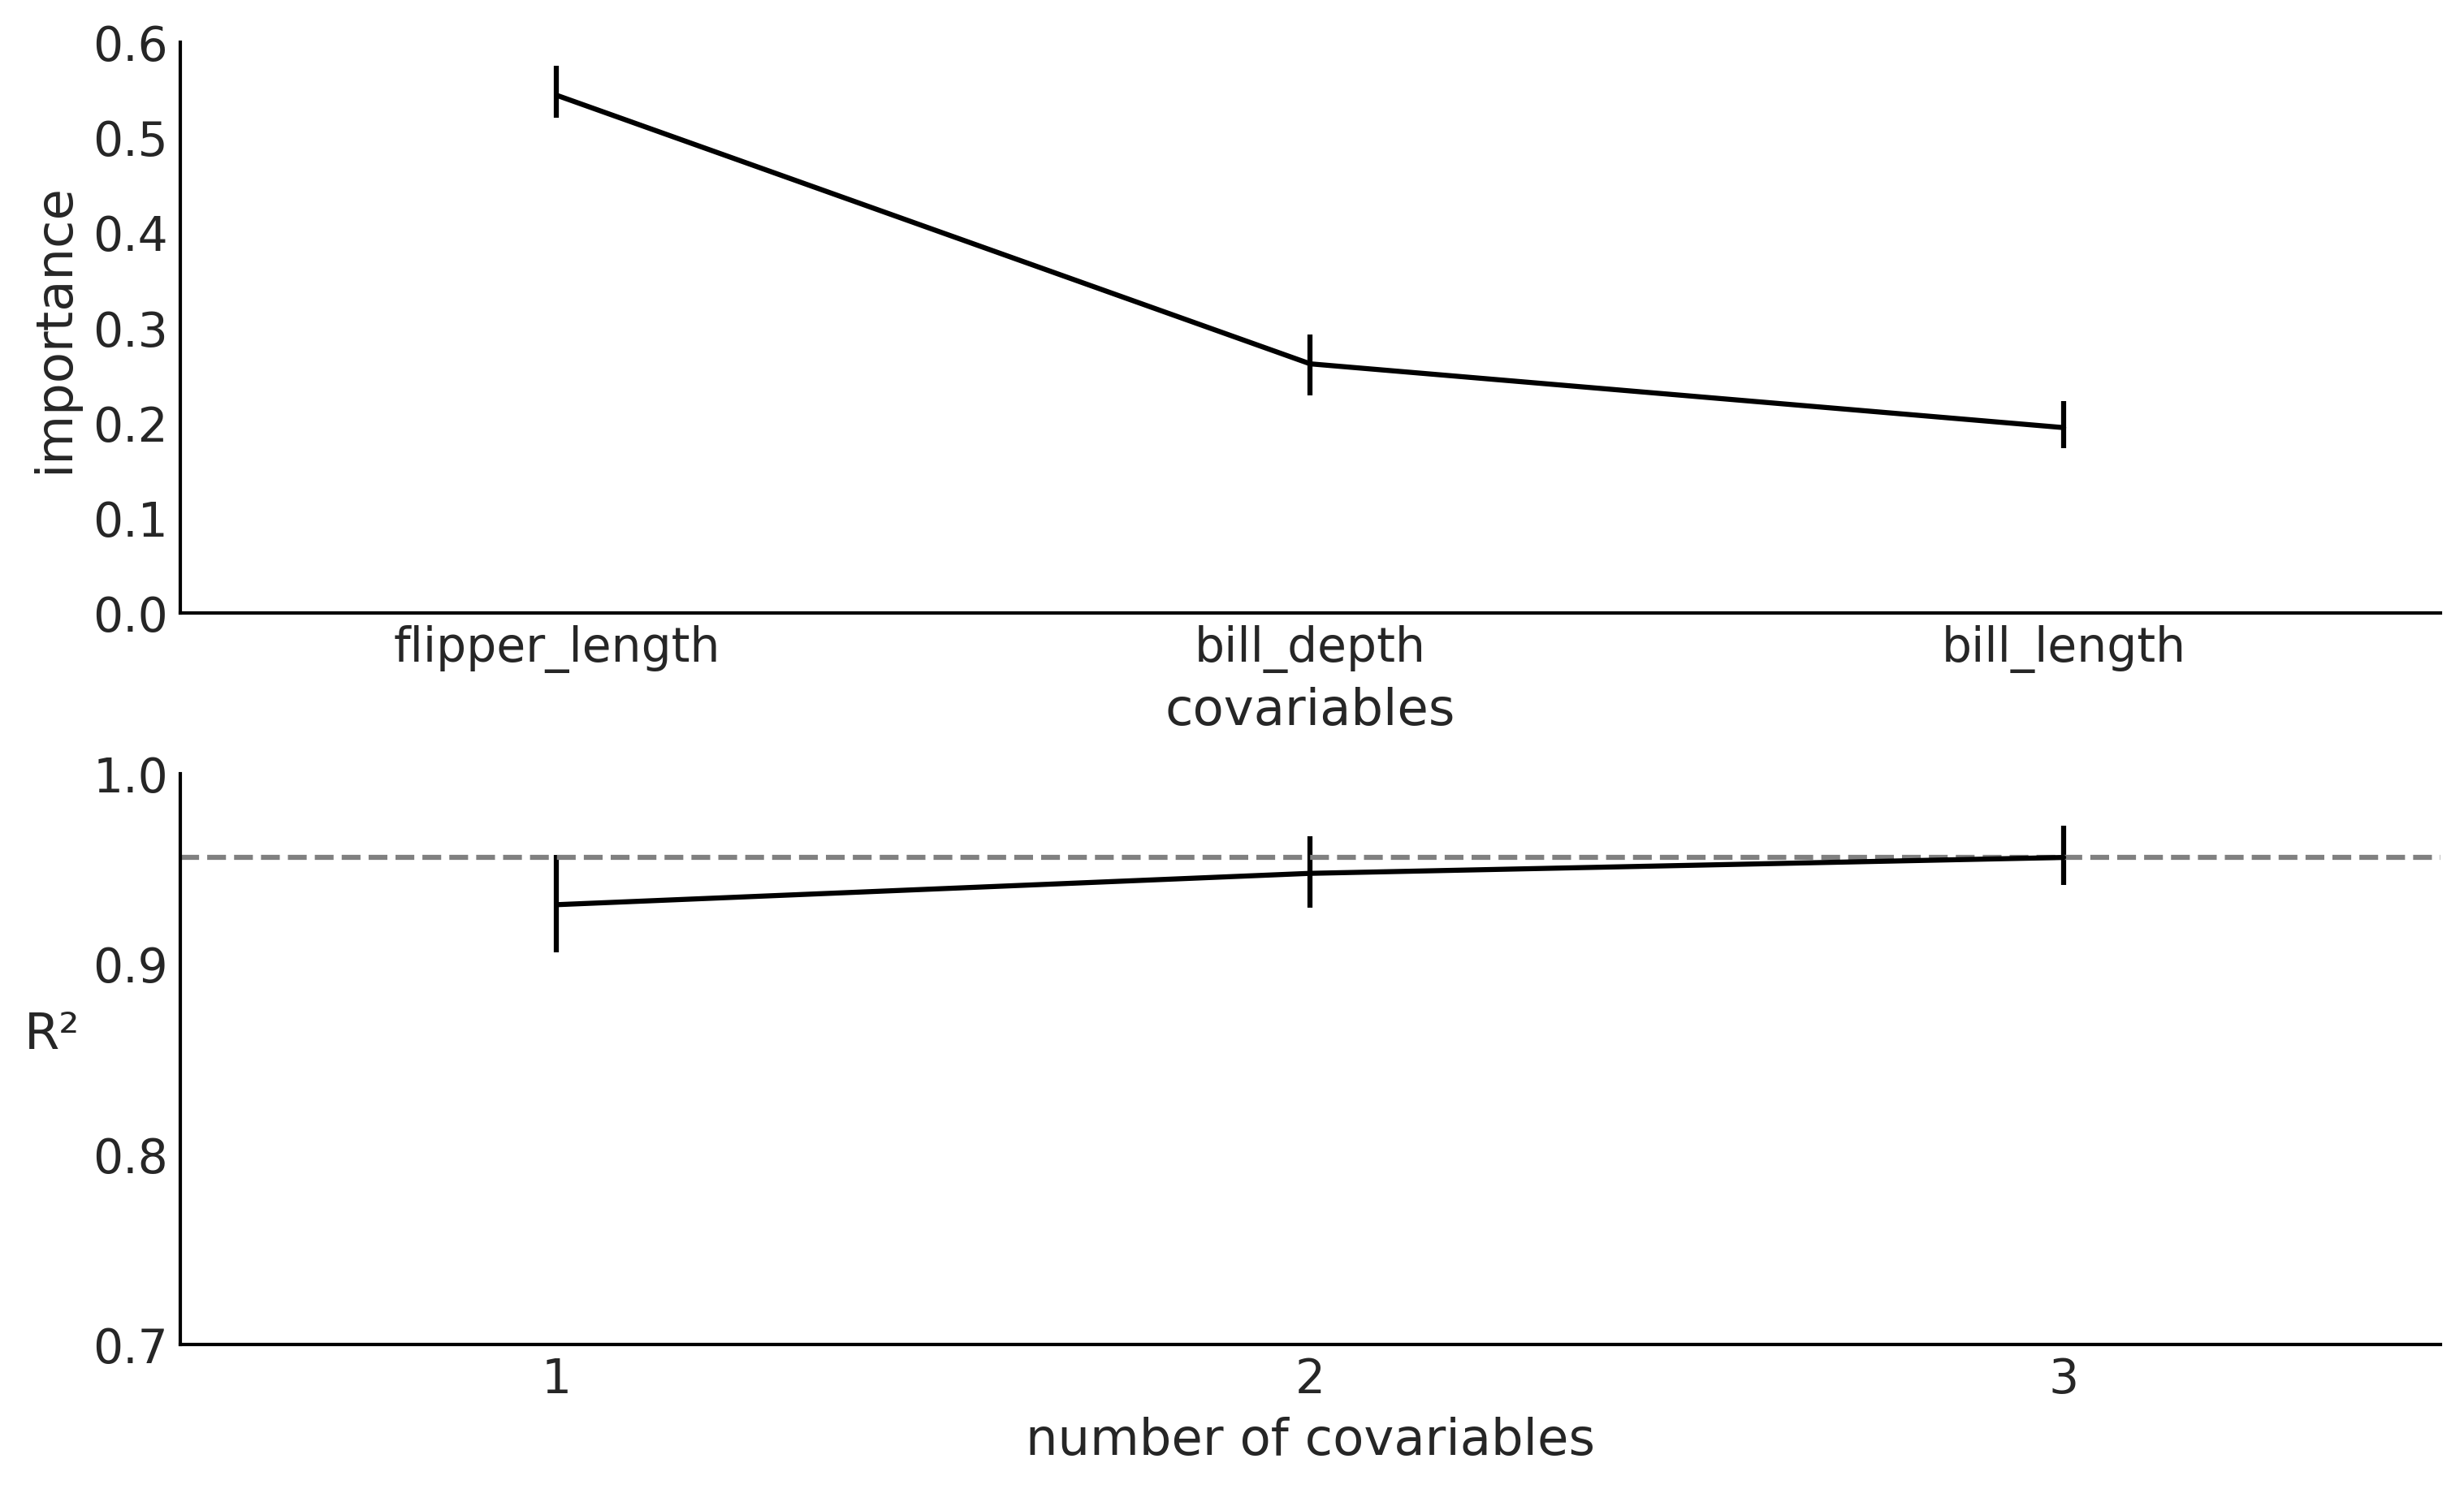

In [10]:
_, axes = pmb.plot_variable_importance(idata_pen, μ, X, figsize=(10, 6))
axes[0].set_ylim(0, .6)
axes[1].set_ylim(0.7, 1)
plt.savefig("../fig/BART_VI.png")

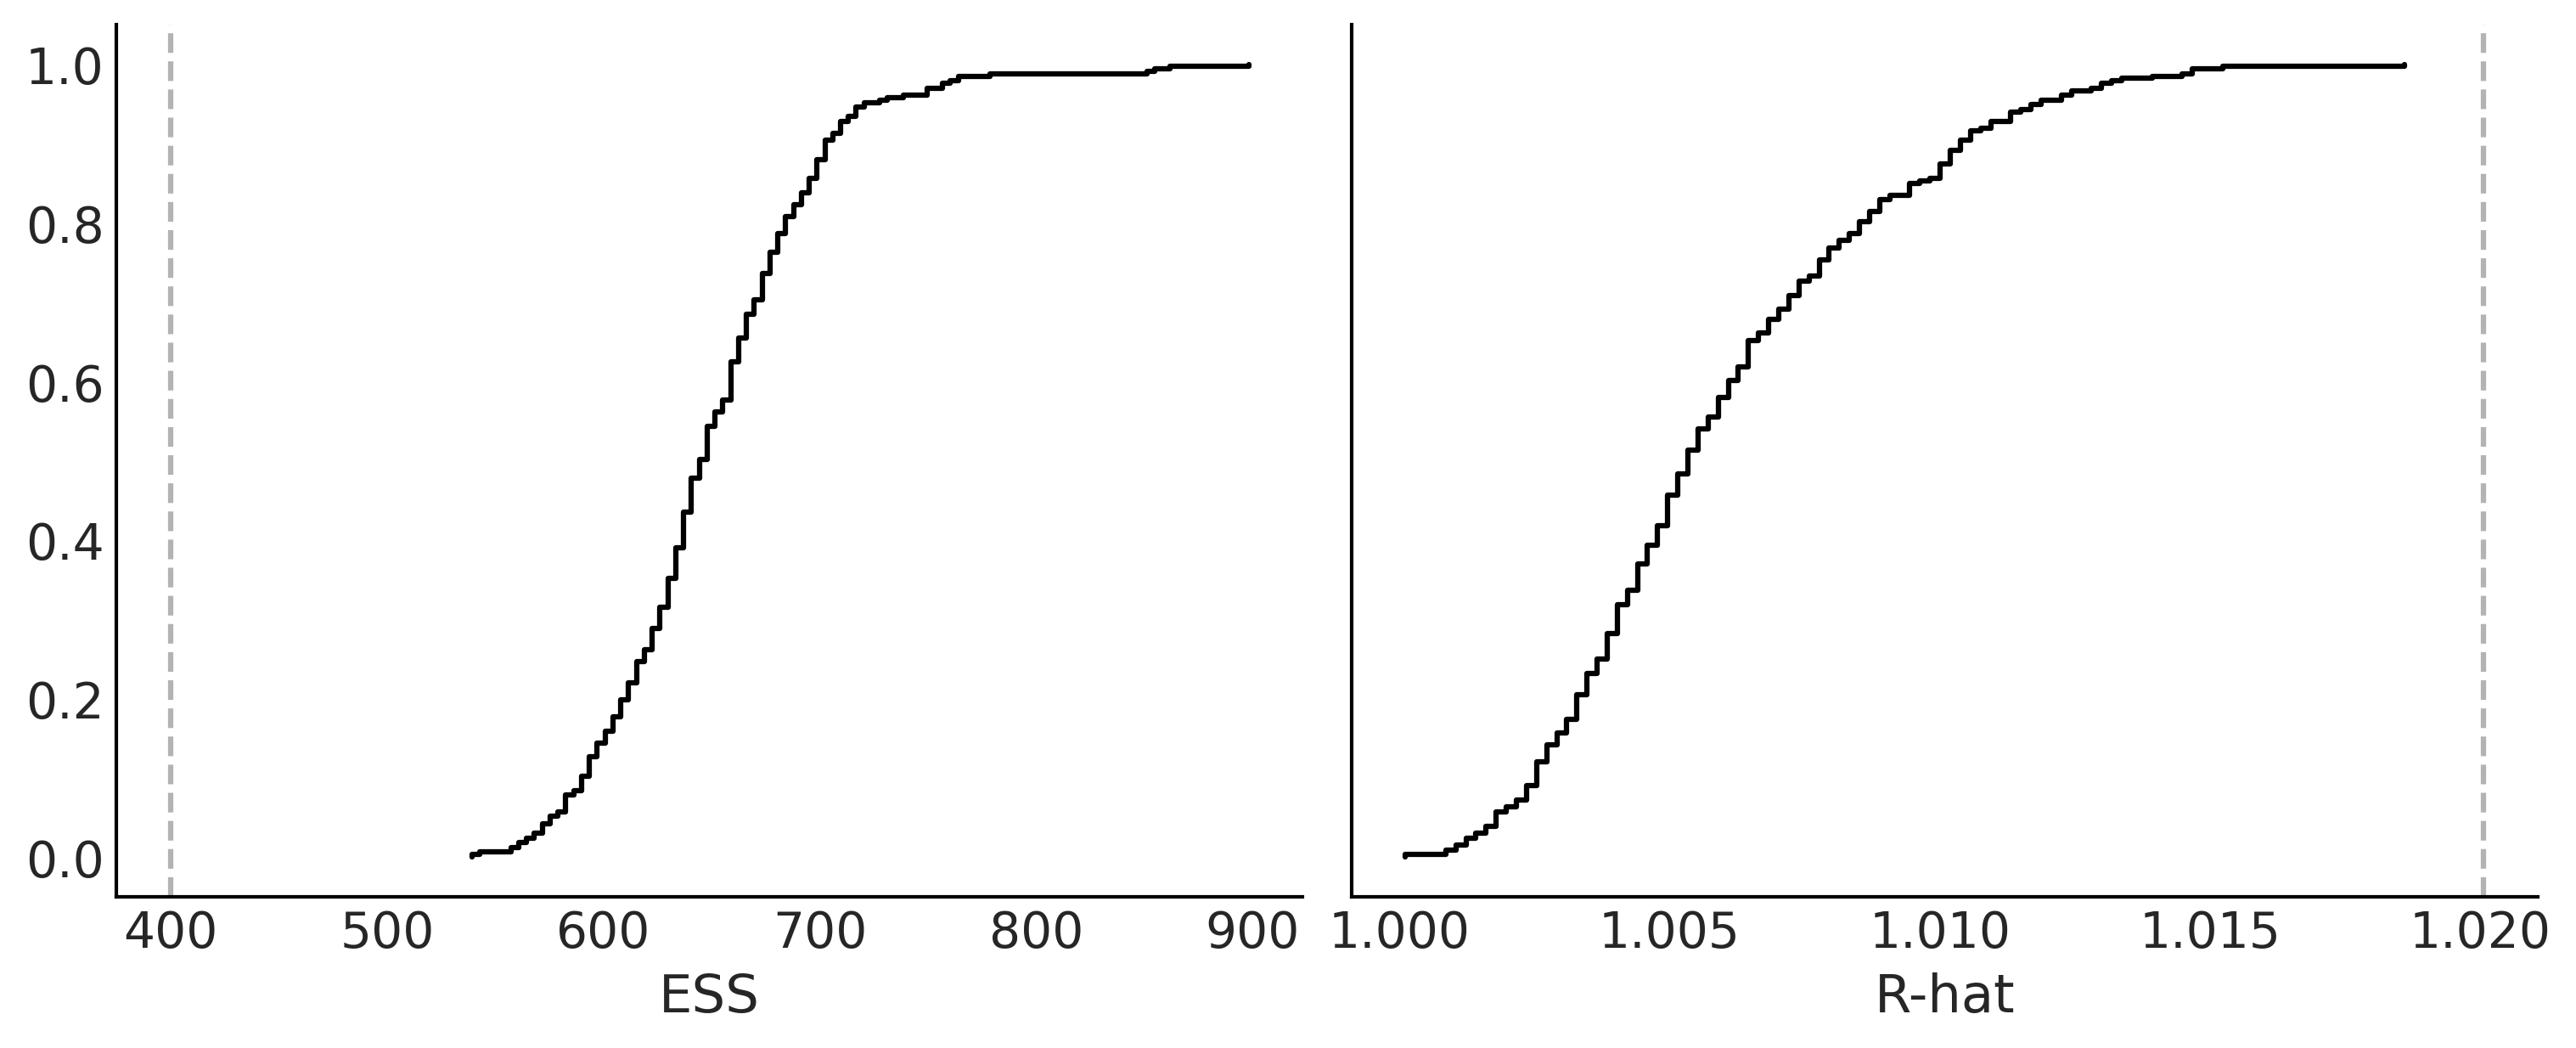

In [11]:
pmb.plot_convergence(idata_pen, var_name="μ", figsize=(10, 4))
plt.savefig("../fig/bart_plot_convergence.png")

In [12]:
daf

NameError: name 'daf' is not defined

 ## Categorical Response

In [ ]:
Y = pen["species"]
X = pen[["flipper_length", "bill_depth", "bill_length", "body_mass"]]
Y.replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)


In [ ]:
with pm.Model() as model_pen:
    μ = pmb.BART("μ", X, Y, m=50, shape=(2, 333))
    μ_p = pt.concatenate([np.ones((1, 333))*-1, μ], axis=0)
    p = pm.Deterministic("p", pm.math.softmax(μ_p.T, axis=1))
    y = pm.Categorical("y", p=p, observed=Y)
    idata_pen = pm.sample(random_seed=123, 
                          step=pmb.PGBART([μ], batch=(0.1, 0.1)),
                          )                       
    pm.sample_posterior_predictive(idata_pen, extend_inferencedata=True)

ValueError: all input array dimensions other than the specified `axis` (0) must match exactly, or be unknown (None), but along dimension 1, the inputs shapes are incompatible: [333 342]

array([[<Axes: title={'center': 'μ\n0, 0'}>,
        <Axes: title={'center': 'μ\n0, 0'}>],
       [<Axes: title={'center': 'μ\n1, 0'}>,
        <Axes: title={'center': 'μ\n1, 0'}>]], dtype=object)

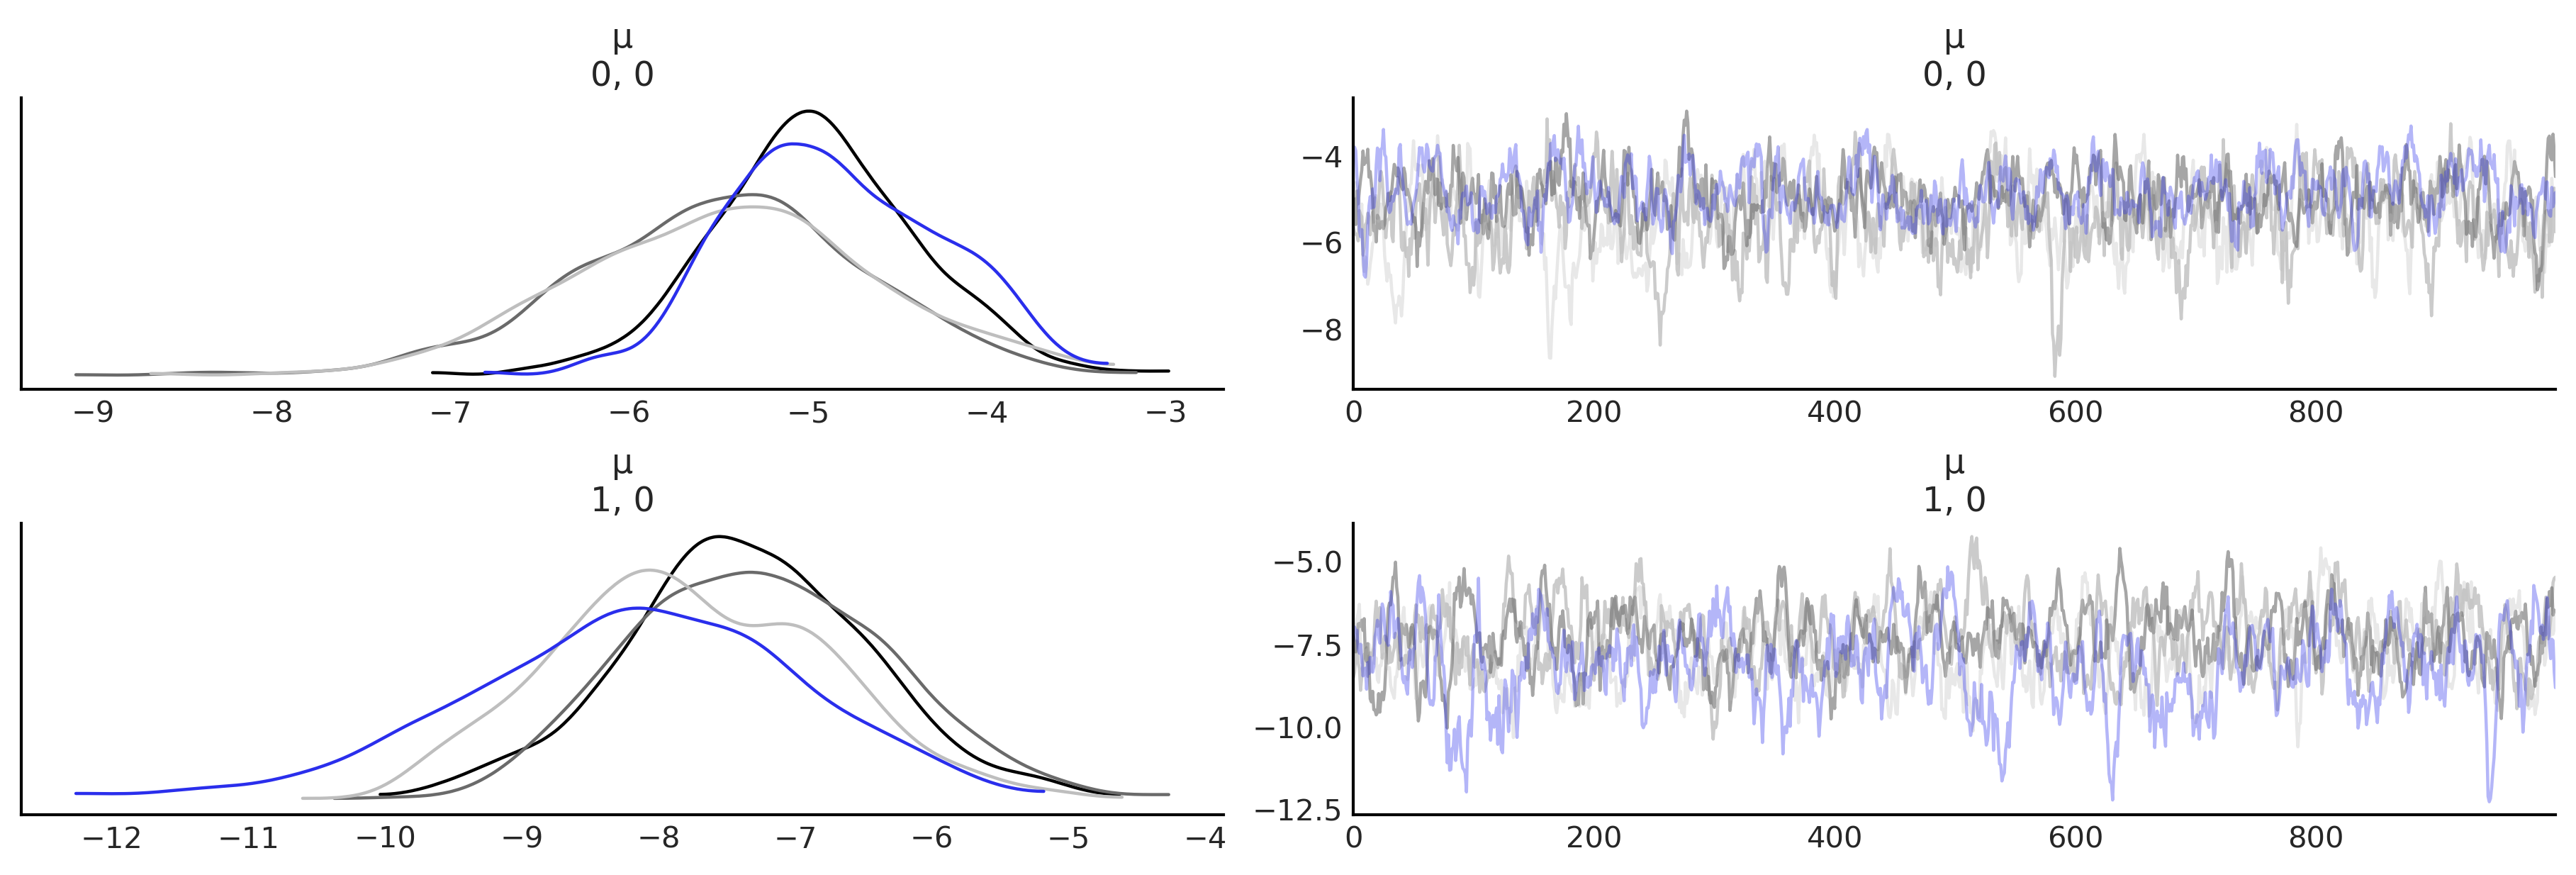

In [ ]:
az.plot_trace(idata_pen, var_names=["μ"], coords={"μ_dim_1": [0]}, compact=False)

array([<Axes: xlabel='ESS'>, <Axes: xlabel='R-hat'>], dtype=object)

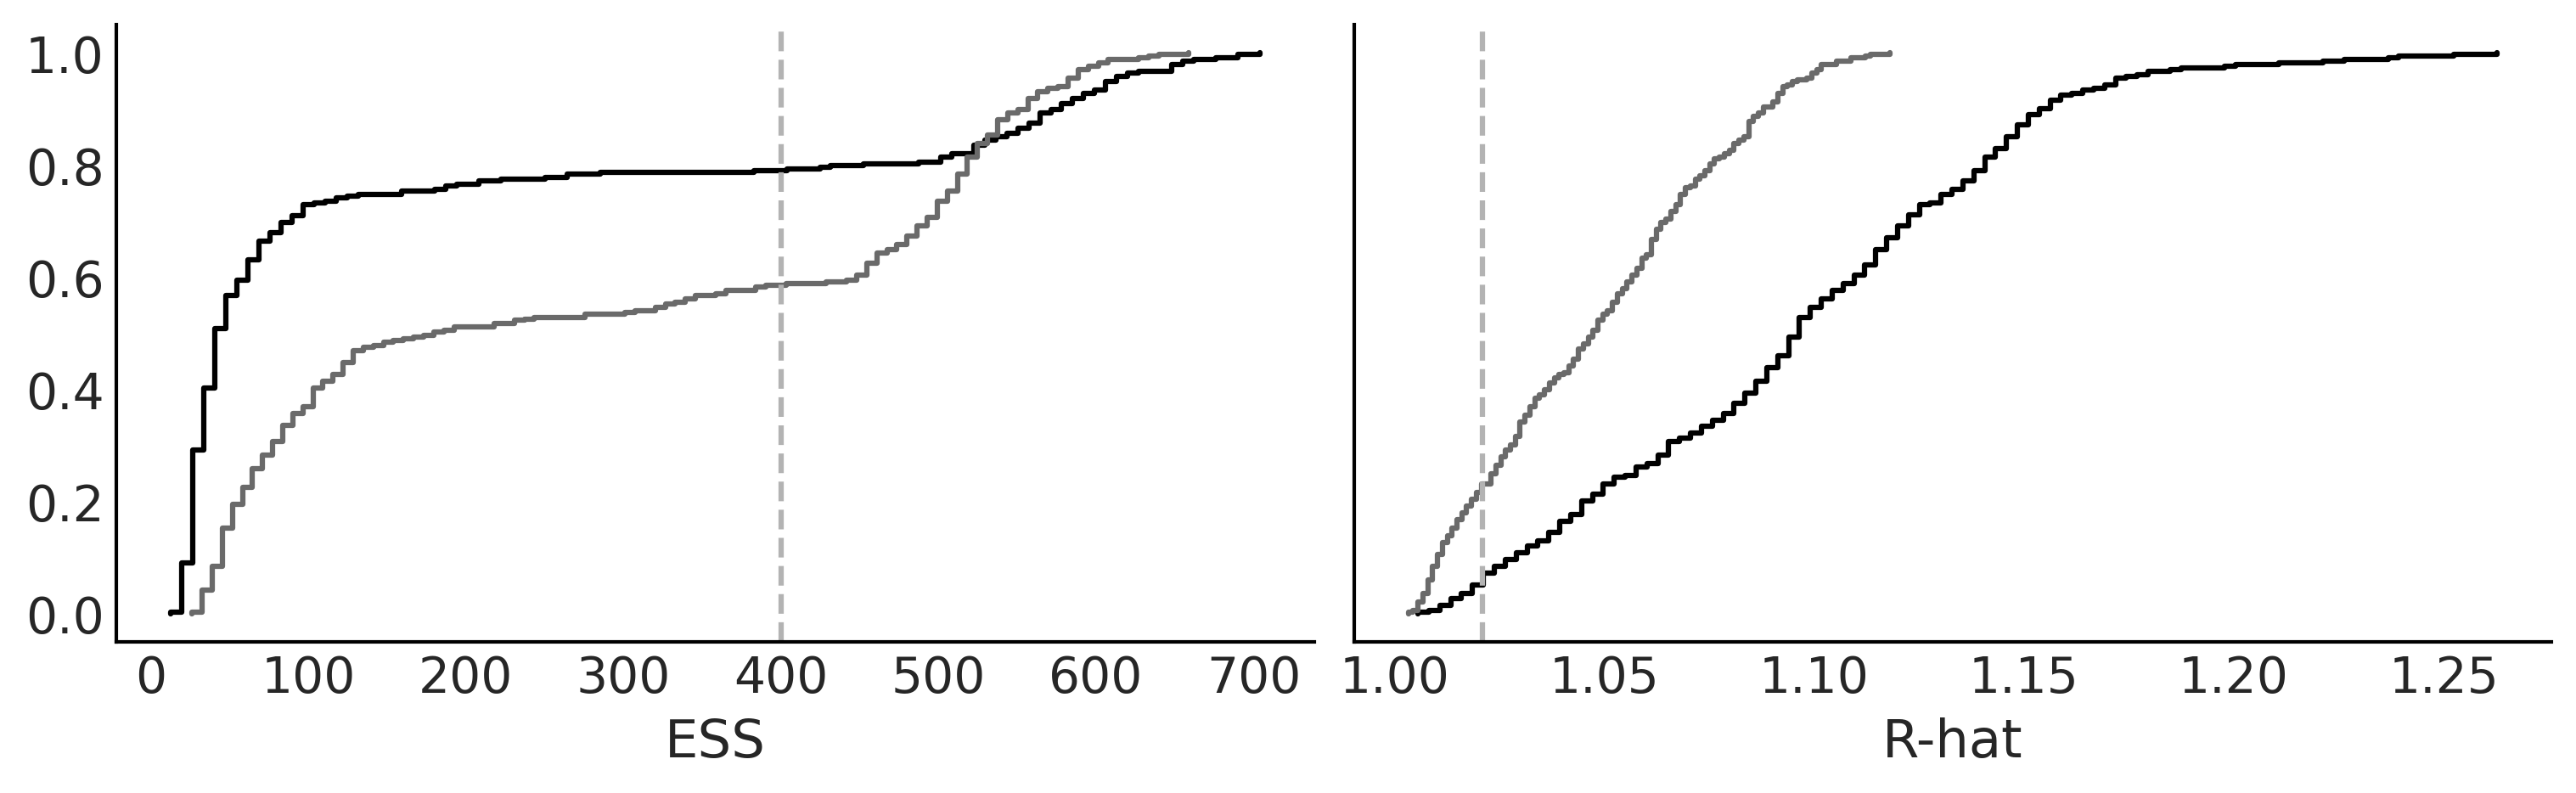

In [ ]:
pmb.plot_convergence(idata_pen, var_name="μ")

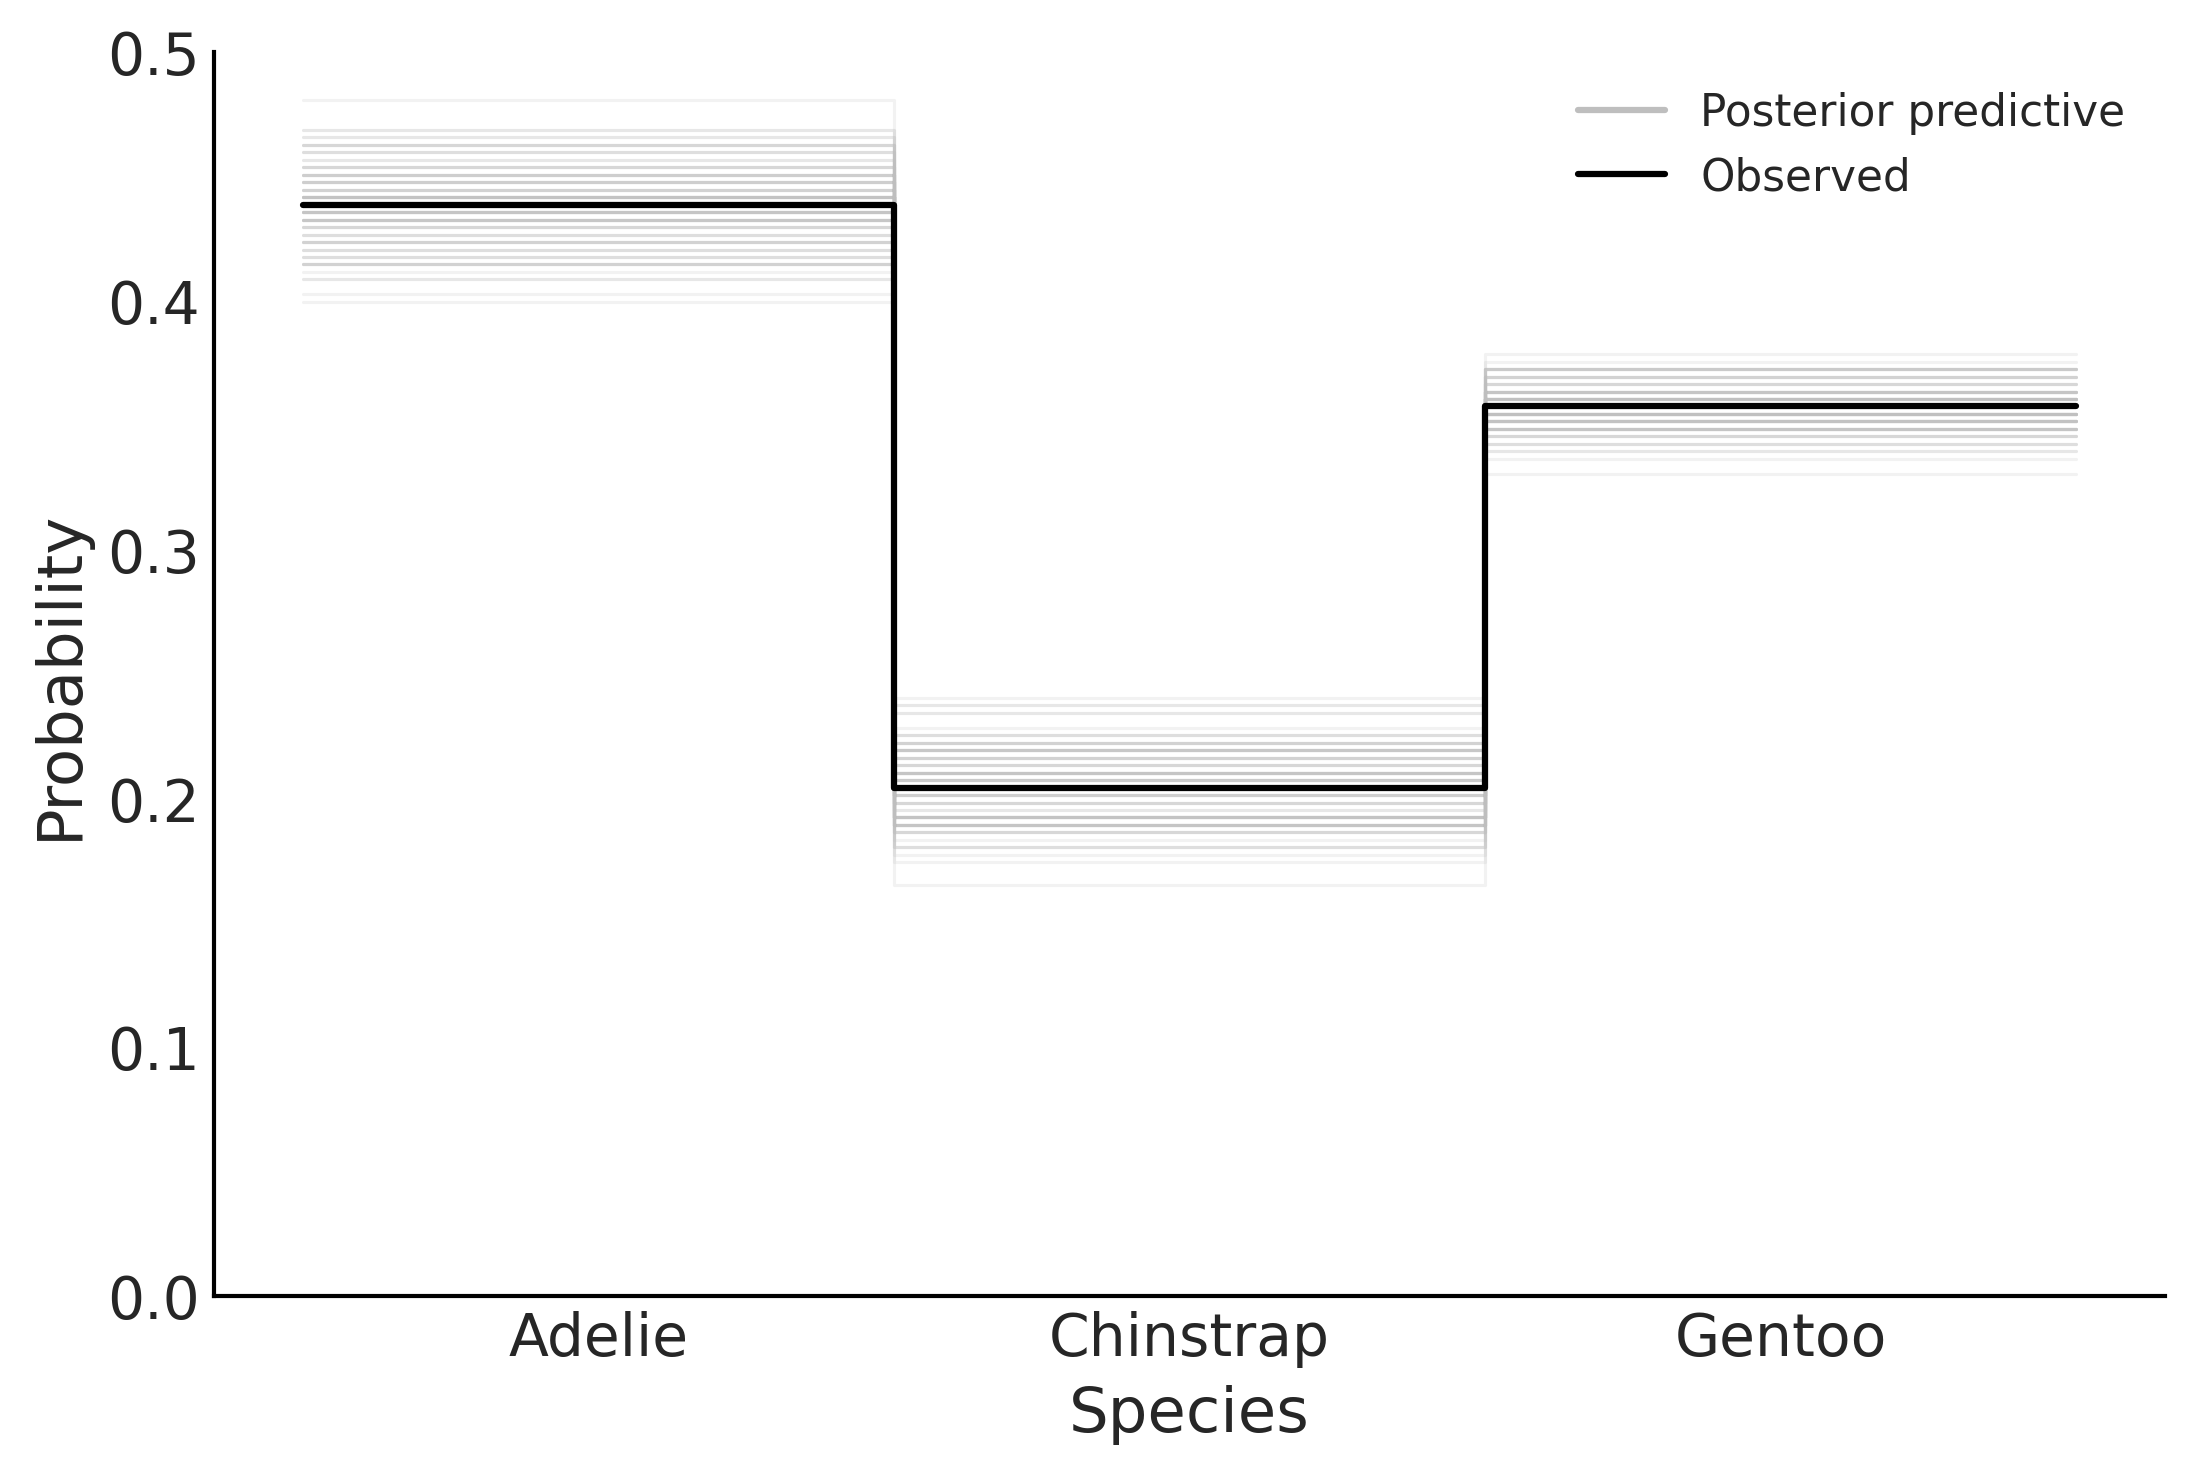

In [ ]:
ax = az.plot_ppc(idata_pen, num_pp_samples=100, mean=False, colors=["C2", "C0", "C1"])
ax.set_xticks([0.5, 1.5, 2.5])
ax.set_xticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
ax.set_xlabel("Species")
ax.set_yticks(np.arange(0, 0.6, 0.1))
ax.set_ylabel("Probability");

In [ ]:
(idata_pen.posterior_predictive == Y.values).mean(("chain", "draw"))["y"].values.mean()

0.9274376876876876

Text(0.5, 0, 'Species')

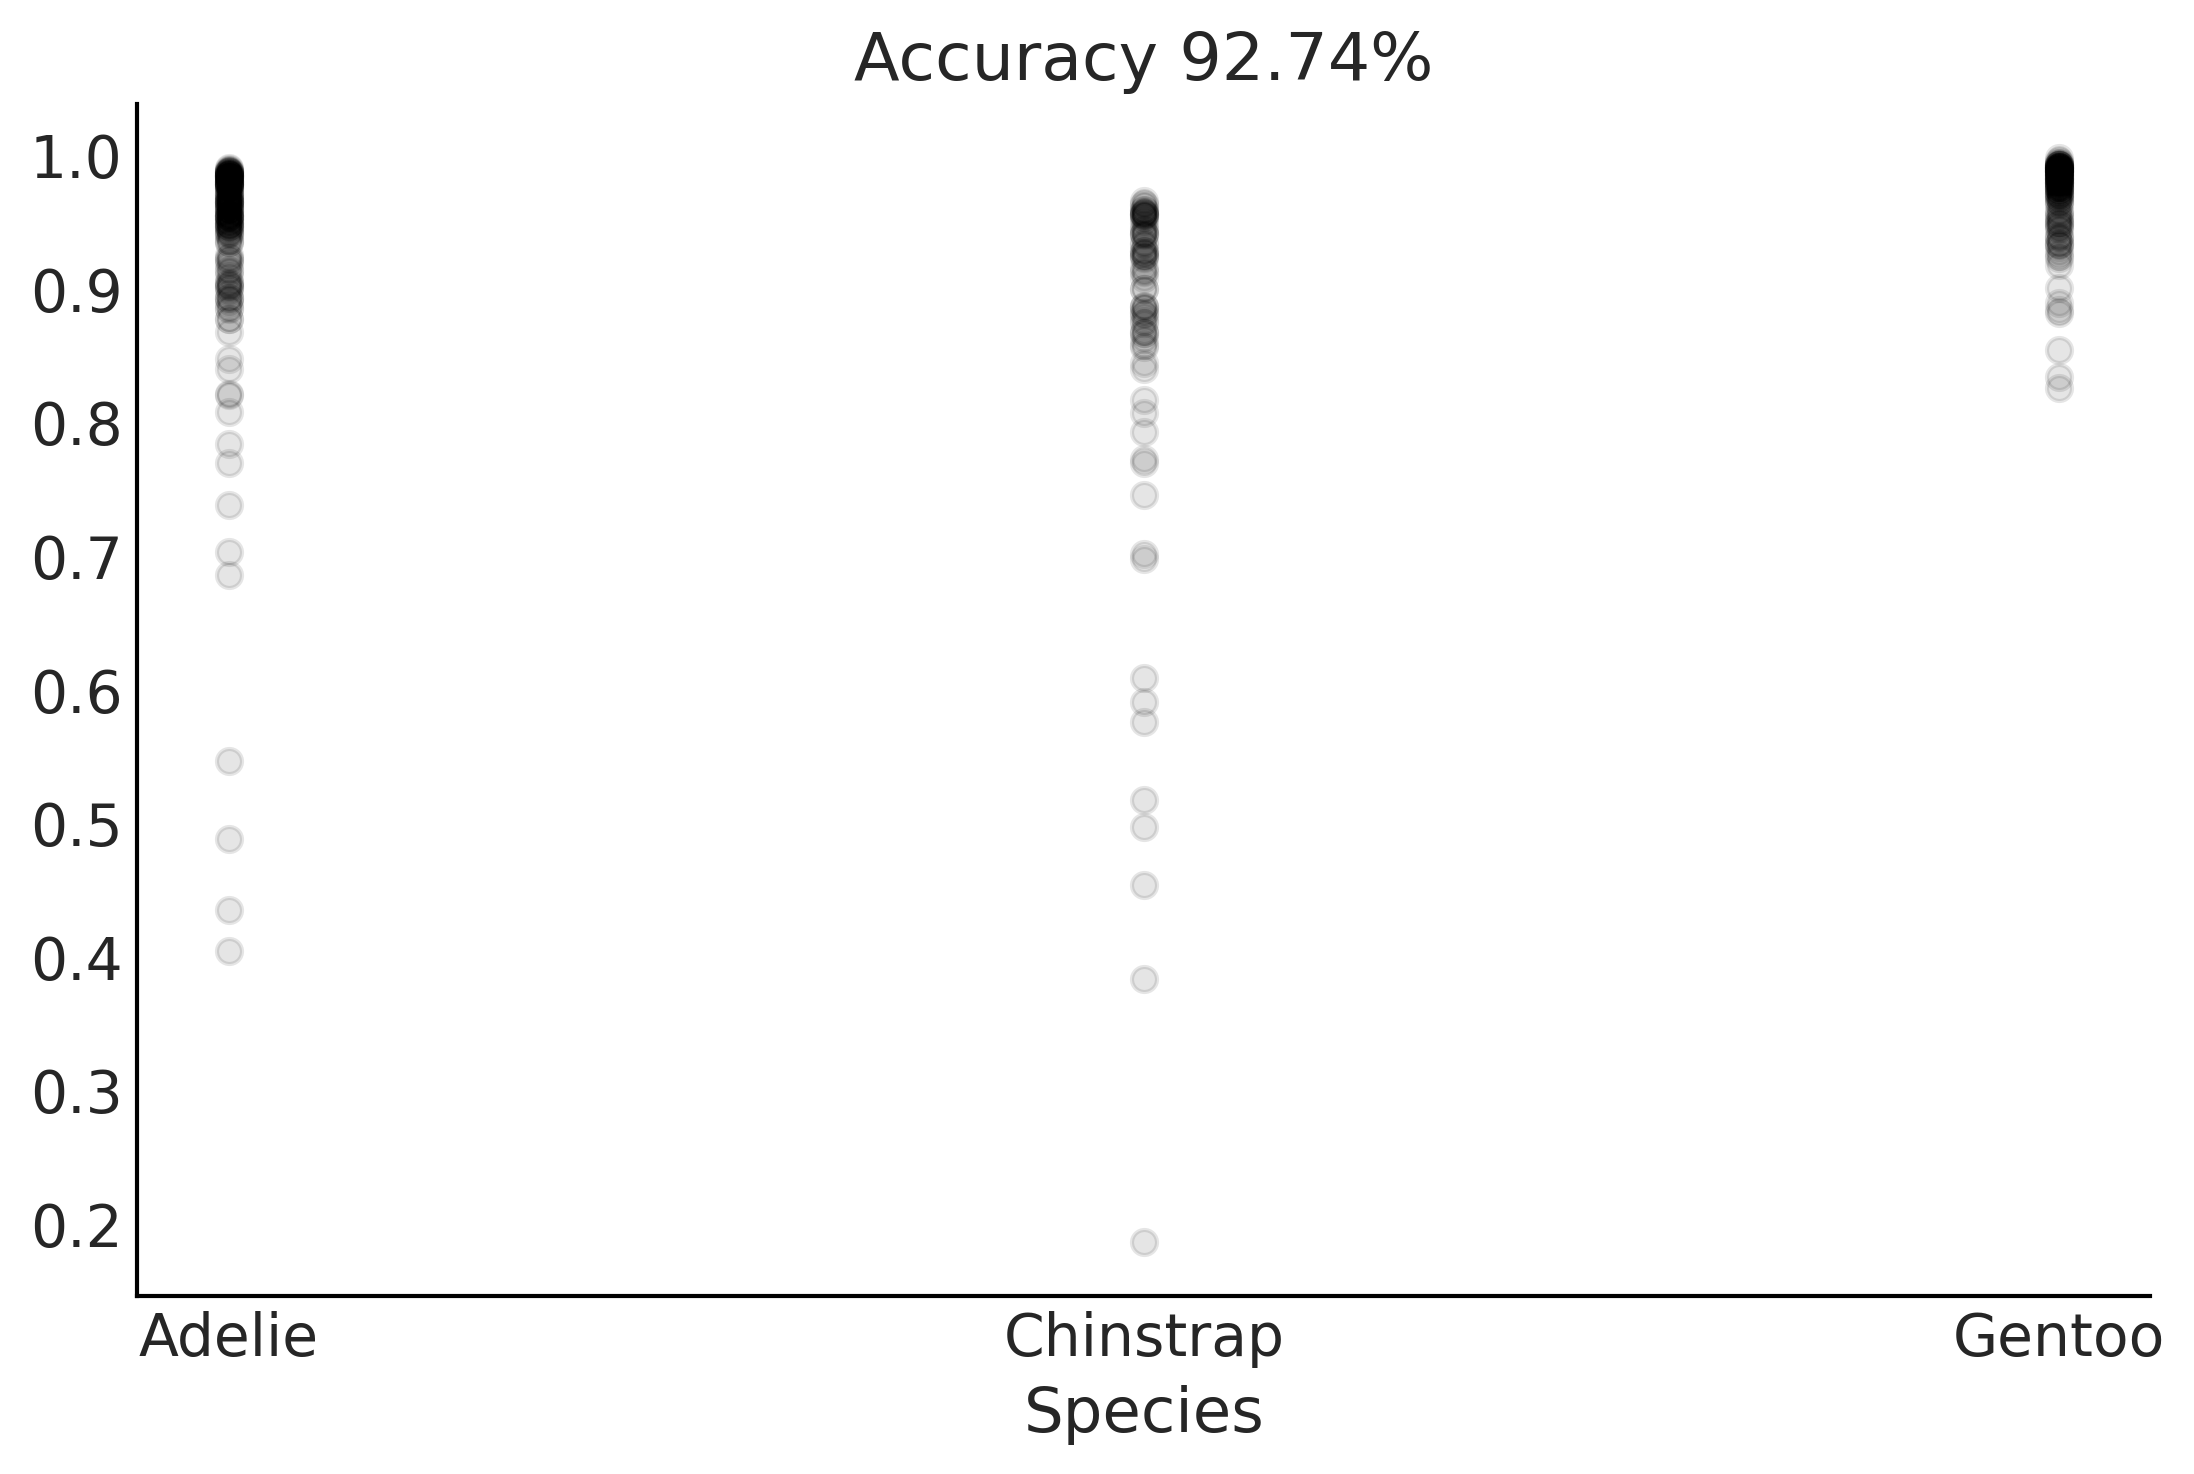

In [ ]:
_, ax = plt.subplots()
acc = (idata_pen.posterior_predictive == Y.values).mean(("chain", "draw"))["y"].values
plt.plot(Y.values, acc, "o", alpha=0.1)
ax.set_title(f"Accuracy {acc.mean()*100:.2f}%")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
ax.set_xlabel("Species")

/home/osvaldo/proyectos/00_BM/pymc-bart/pymc_bart/utils.py:517: UserWarning: The grid is smaller than the number of available variables to plot.
                    Automatically adjusting the grid size.
  warnings.warn(
/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/arviz/plots/hdiplot.py:160: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/arviz/plots/hdiplot.py:160: FutureWarn

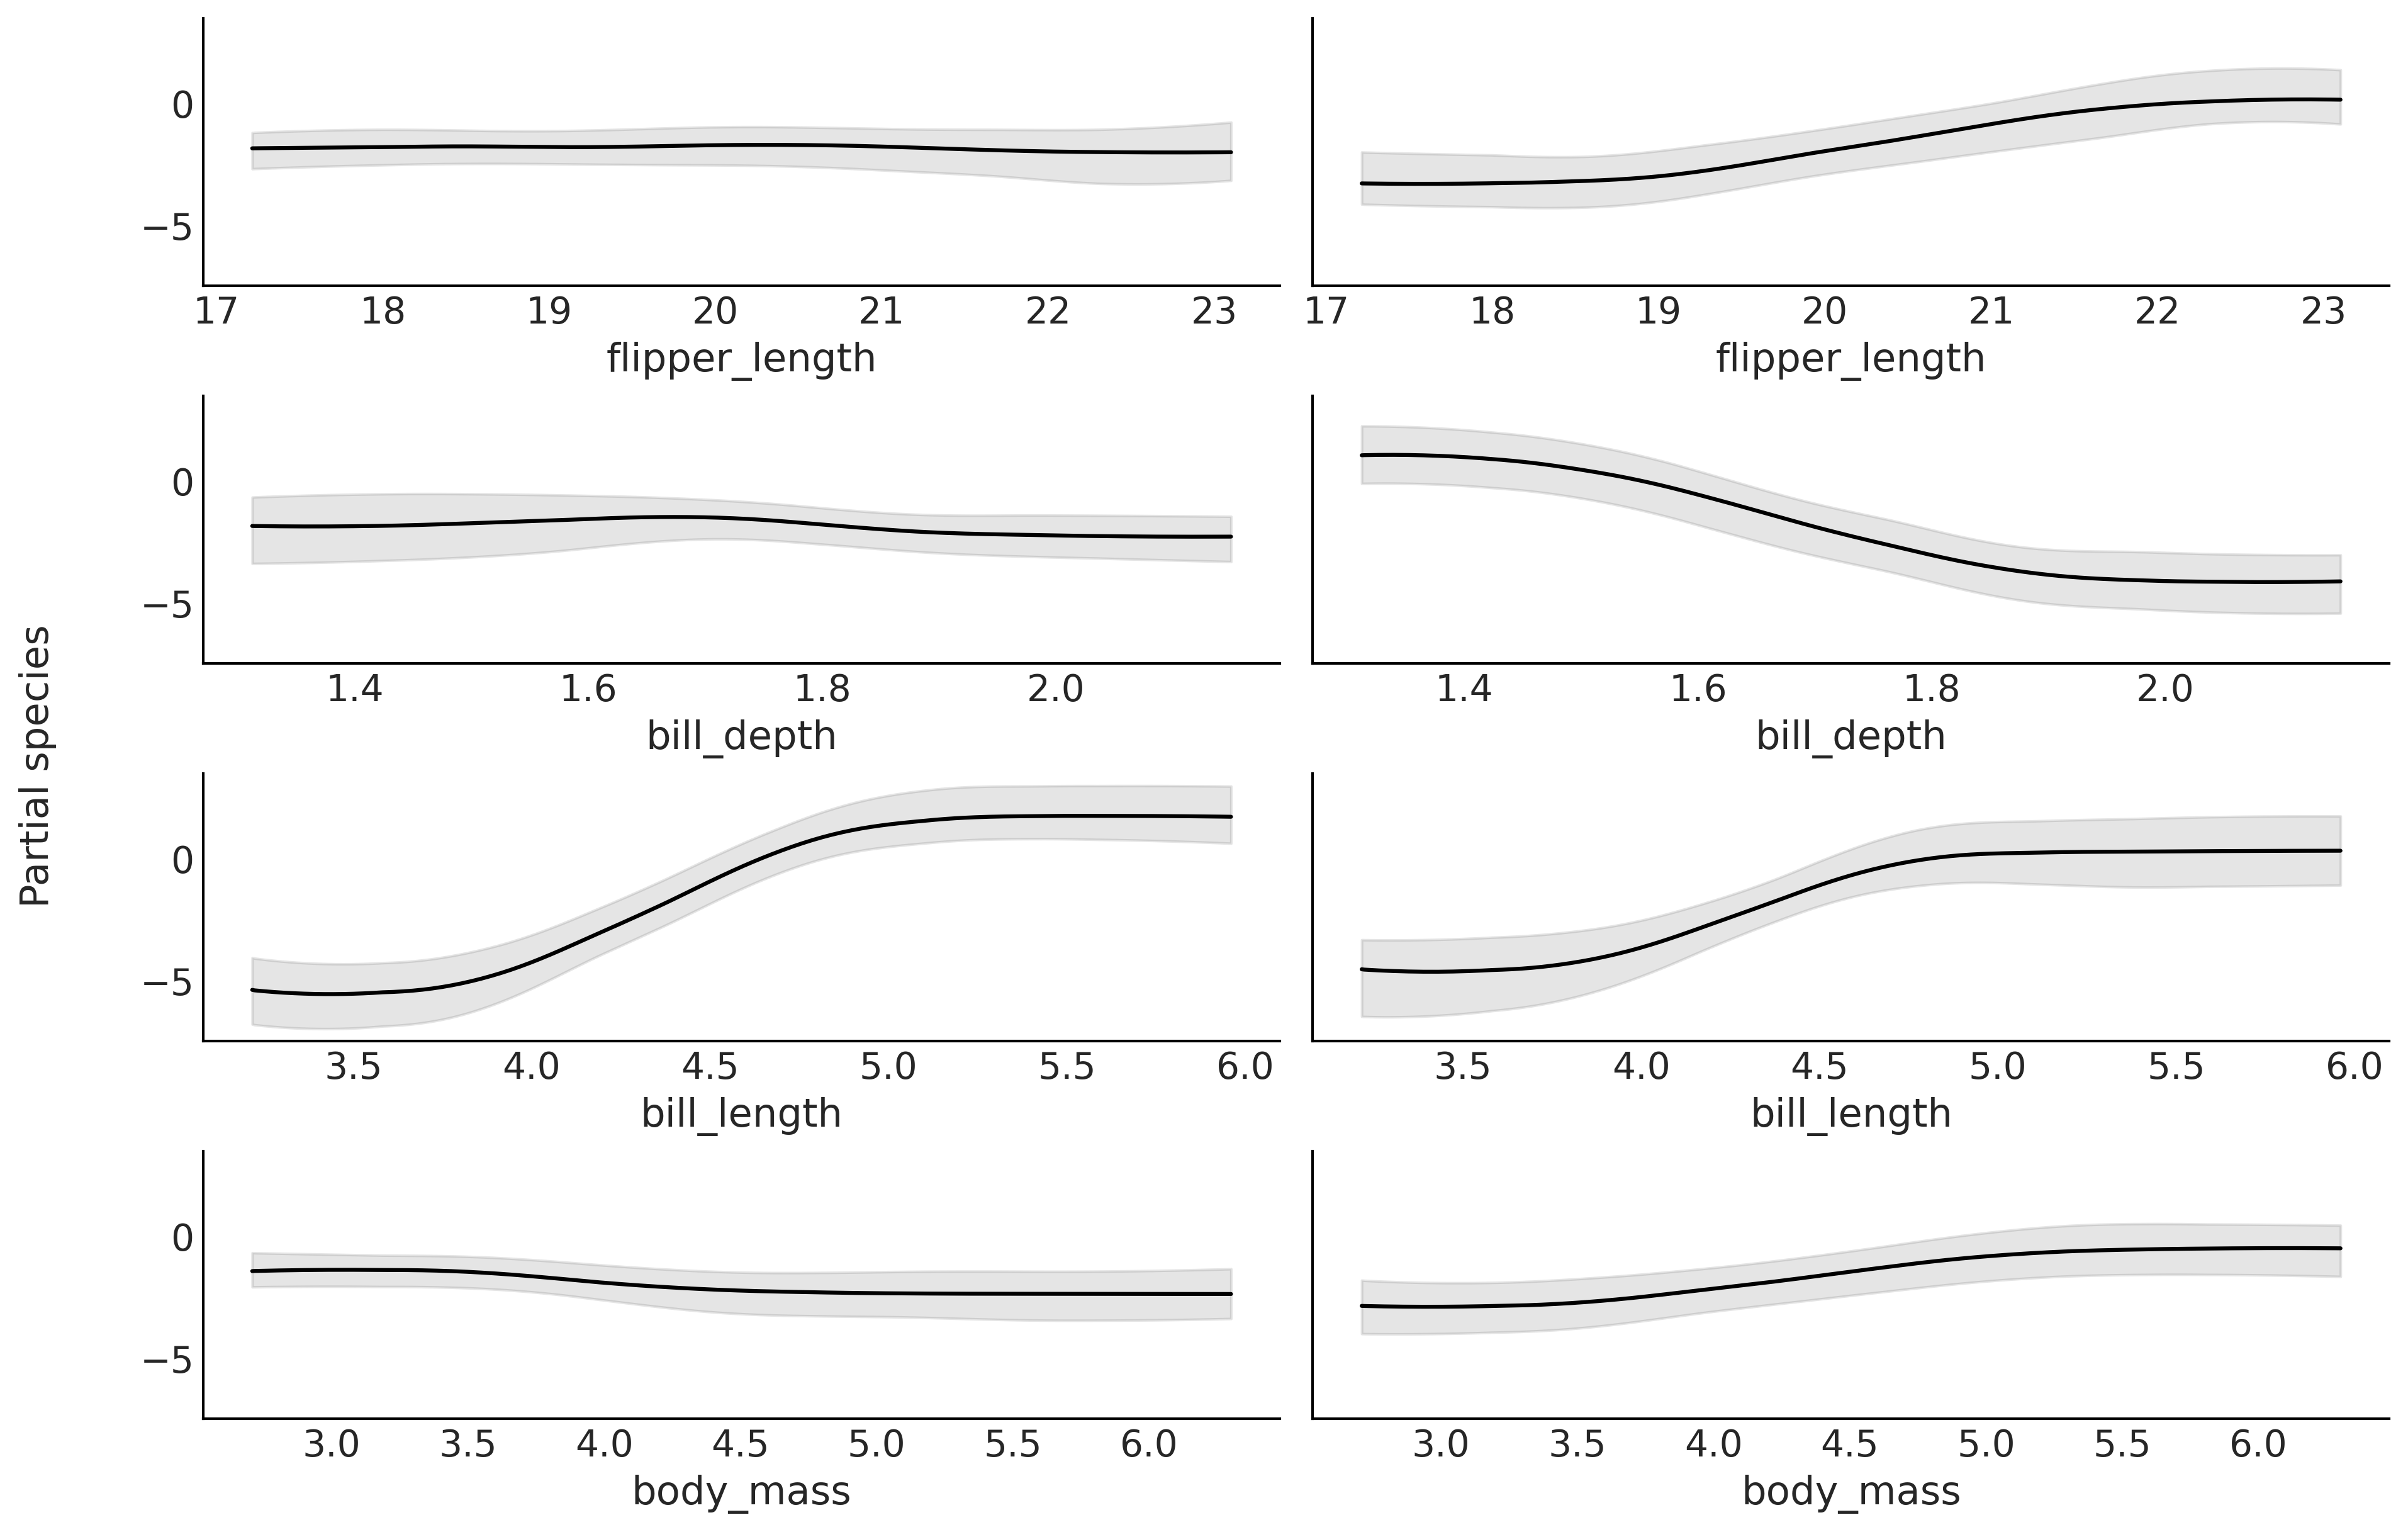

In [ ]:
from scipy.special import softmax
pmb.plot_pdp(μ, X, Y, figsize=(12, 8), grid=(3,2));

/home/osvaldo/proyectos/00_BM/pymc-bart/pymc_bart/utils.py:778: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  chains_hdi = az.hdi((var_imp_chains.T / var_imp_chains.sum(axis=1)).T)[indices]


(array([2, 1, 0, 3]),
 array([<Axes: xlabel='covariables', ylabel='importance'>,
        <Axes: xlabel='number of covariables', ylabel='R²'>], dtype=object))

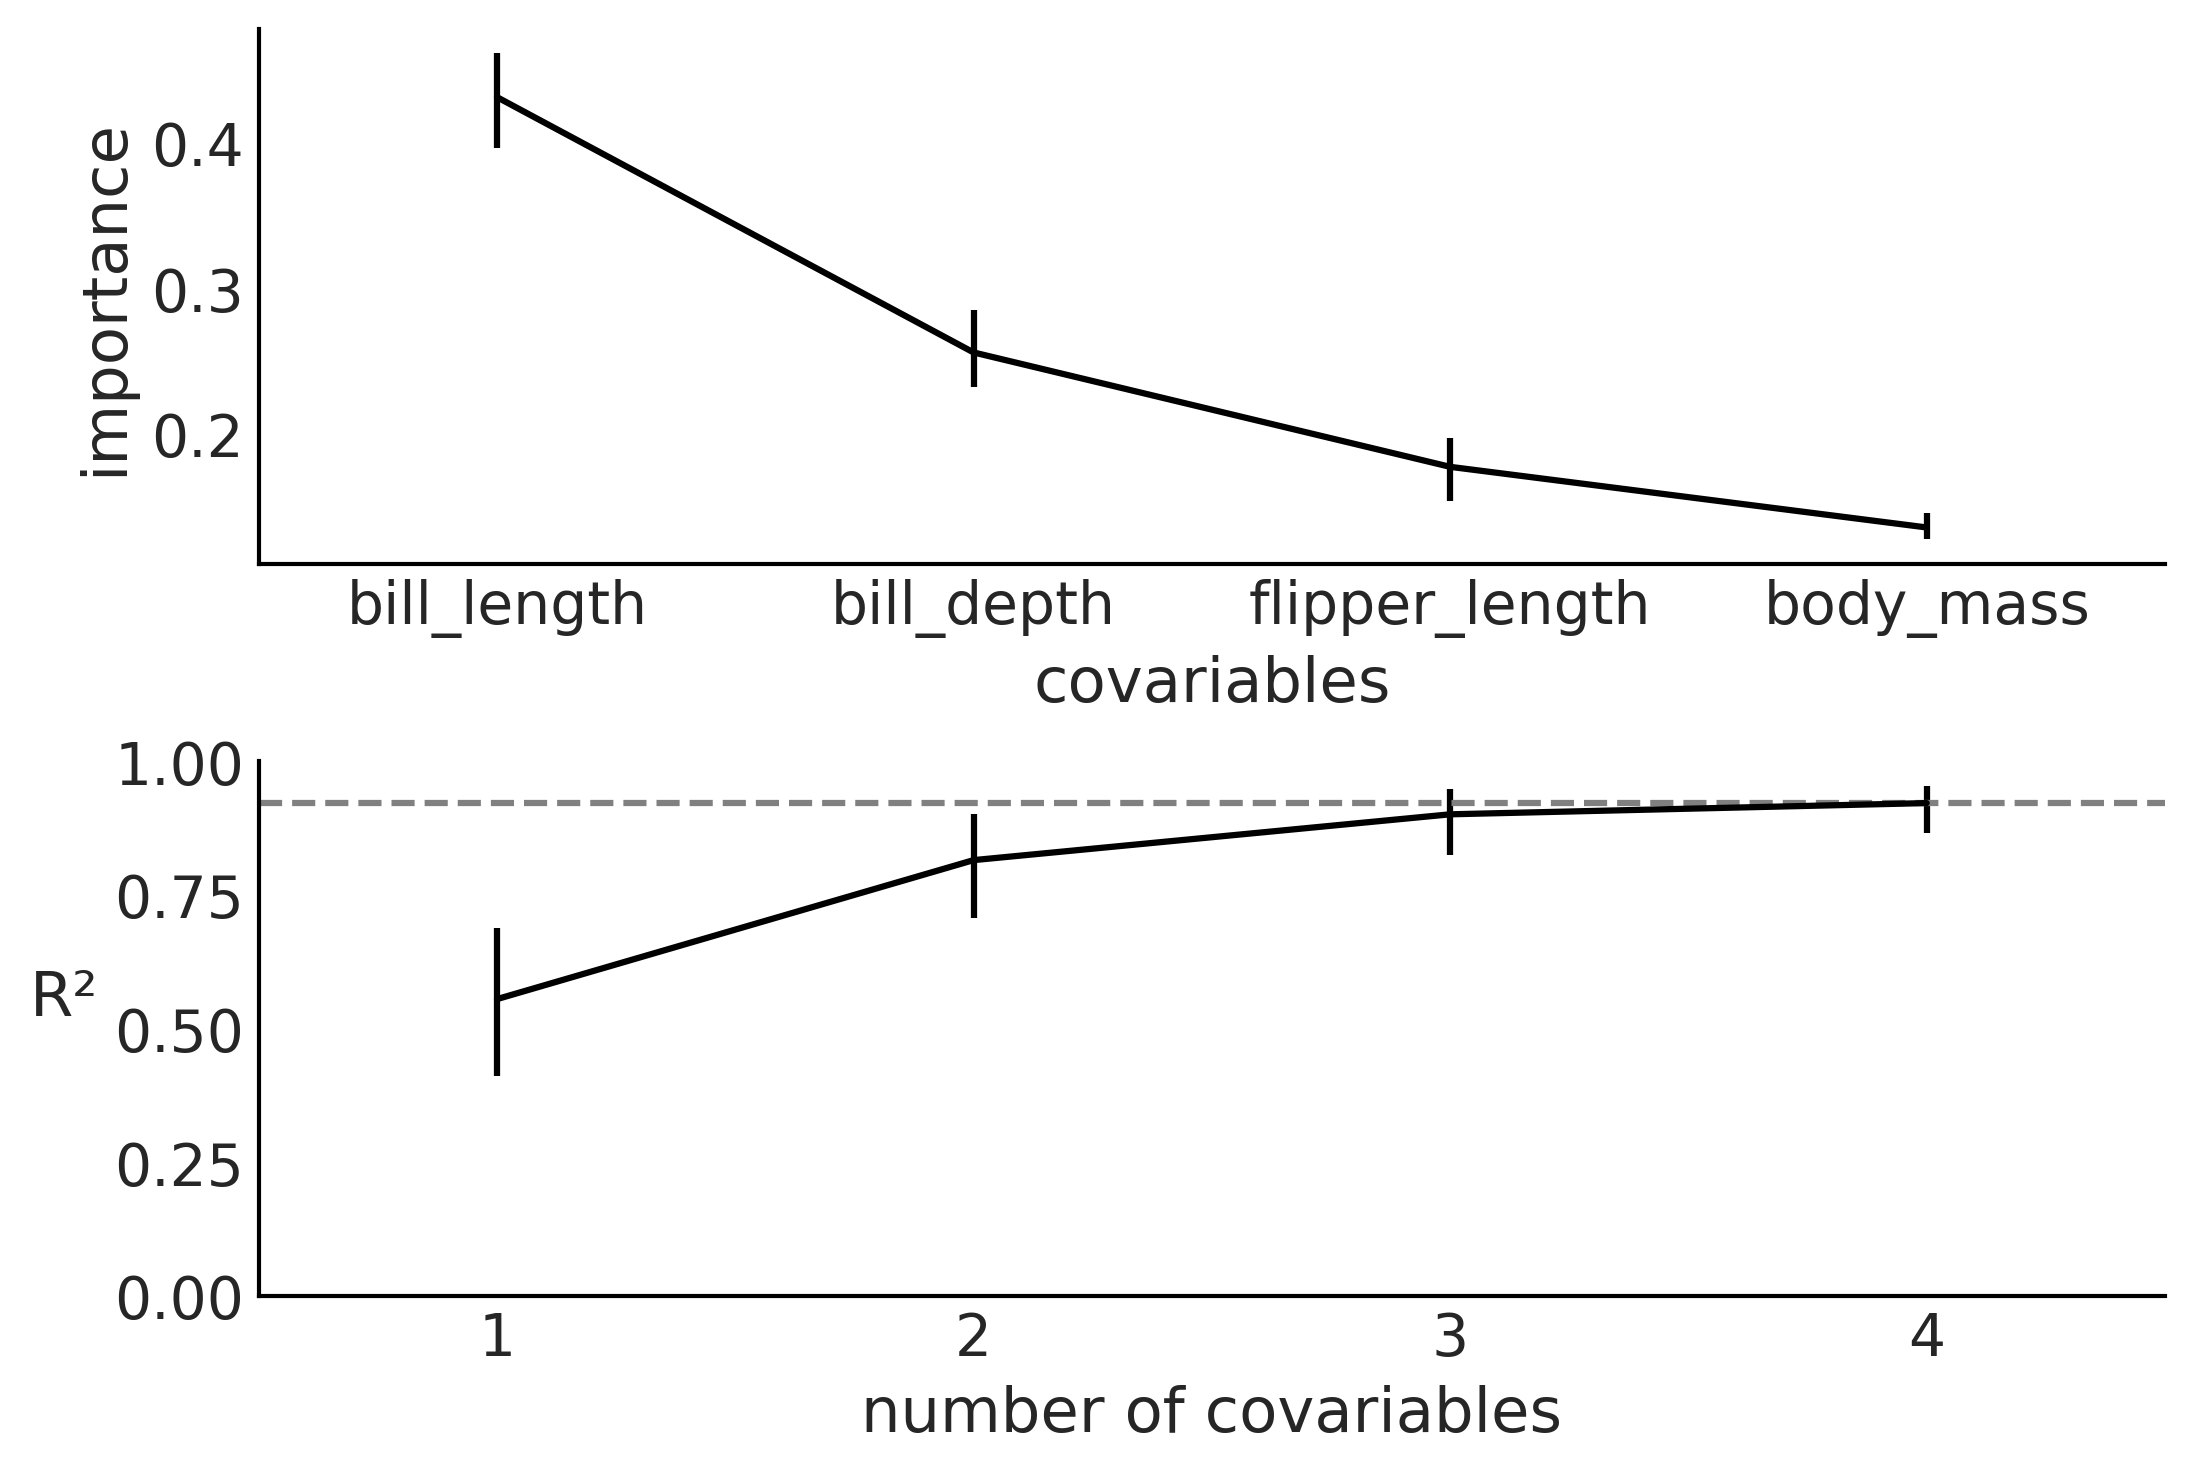

In [ ]:
pmb.plot_variable_importance(idata_pen, μ, X)

In [ ]:
HACER un modelo con valores species como predictor y probar si split_rules ayuda en algo... chequear el ejemplode juani orduz https://juanitorduz.github.io/retention_bart/

SyntaxError: invalid syntax (1628062244.py, line 1)

In [ ]:
import seaborn as sns

/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)
/home/osvaldo/anaconda3/envs/pymc/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


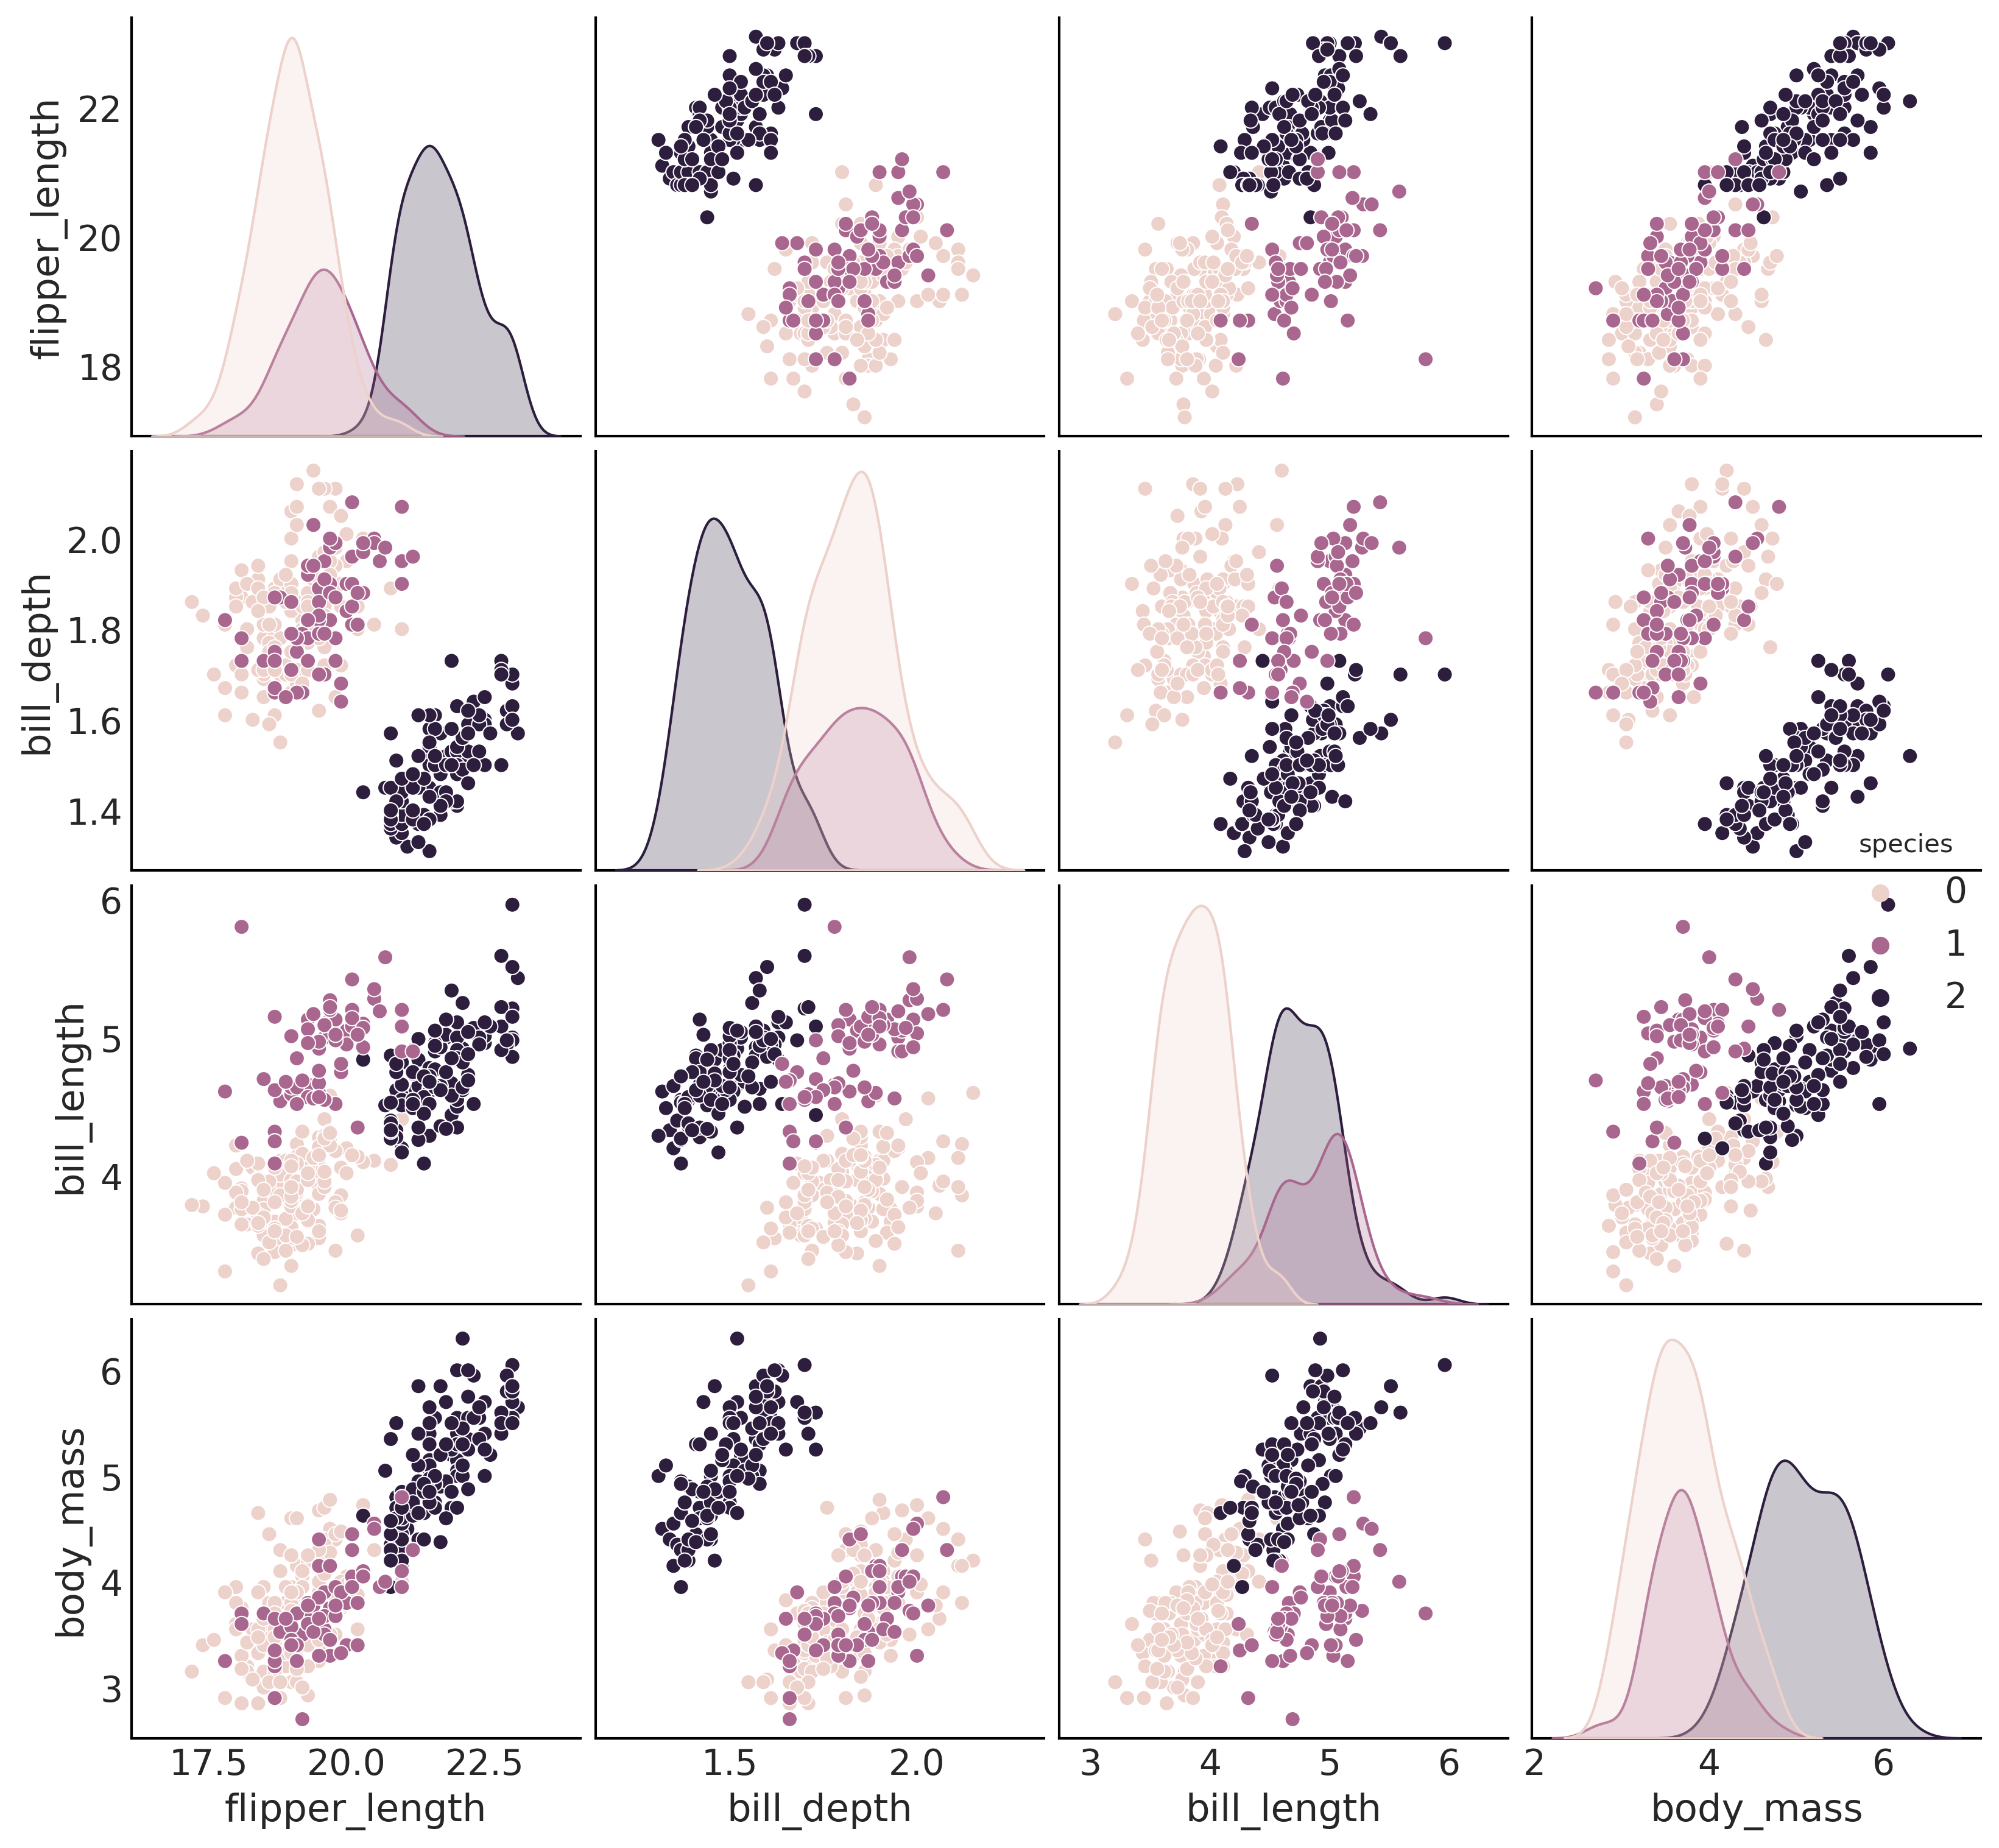

In [ ]:
sns.pairplot(data=pen, hue="species", vars=["flipper_length", "bill_depth", "bill_length", "body_mass"])